In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from inc_ms_fda import IncFDO
from prog_ms_fda import ProgressiveFDA

In [2]:
df = pd.read_json('../combined-farm-data.json')

In [26]:
date = '2019-07-09'
filtered_df = df[pd.to_datetime(df['timestamp']).dt.date == pd.to_datetime(date).date()]
filtered_df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
293811,2019-07-09 21:30:45,0.1,1.562182e+09,NaN,2.663690e+07,NaN,2242.36,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293812,2019-07-09 21:31:00,0.1,1.562182e+09,NaN,2.664173e+07,NaN,1710.80,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293813,2019-07-09 21:31:15,0.1,1.562182e+09,NaN,2.664173e+07,NaN,1710.80,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293814,2019-07-09 21:31:30,0.1,1.562182e+09,NaN,2.664275e+07,NaN,1710.80,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293815,2019-07-09 21:31:45,0.1,1.562182e+09,NaN,2.664300e+07,NaN,1710.80,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939635,2019-07-09 23:58:45,0.0,1.562182e+09,NaN,2.660560e+07,NaN,2852.63,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939636,2019-07-09 23:59:00,0.0,1.562182e+09,NaN,2.660386e+07,NaN,2852.63,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939637,2019-07-09 23:59:15,0.0,1.562182e+09,NaN,2.660386e+07,NaN,2852.63,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939638,2019-07-09 23:59:30,0.0,1.562182e+09,NaN,2.660883e+07,NaN,2852.63,0.0,99.900000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_sorted = filtered_df.sort_values(by='timestamp', ascending=True)
df_sorted.to_csv(f'far_data_{date}.csv', index=False)

In [31]:
cols = [
        'timestamp', 'cpu_system', 'boottime', 'Pool Size Time_P1', 'mem_free',
        'Missed Buffers_P1', 'bytes_out', 'cpu_user', 'cpu_idle',
        'Pool Size Data_P1', 'pkts_out', 'load_fifteen', 'part_max_used',
        'load_five', 'mem_shared', 'swap_free', 'Pool Size Events_P1',
        'mem_total', 'load_one', 'mem_cached', 'mem_buffers', 'pkts_in',
        'cpu_speed', 'bytes_in', 'cpu_wio', 'cpu_nice', 'disk_free',
        'disk_total', 'cpu_aidle', 'proc_total', 'swap_total', 'proc_run',
        'cpu_num', 'nodeId', 'RPCRetrans_rate', 'TotalRetrans_rate',
        'TCPSlowStartRetrans_rate', 'TCPFastRetrans_rate', 'RetransSegs_rate',
        'TCPLostRetransmit_rate', 'TCPForwardRetrans_rate', 'TotalRetrans',
        'TCPSlowStartRetrans', 'RPCRetrans', 'TCPFastRetrans',
        'TCPLostRetransmit', 'TCPForwardRetrans', 'RetransSegs'
    ]

# 2024-02-21 14:15:00 - 15:54:15
# df = pd.read_csv('far-csv-data/far_data_2024-02-21.csv', \
#                 skiprows=15000,\
#                 nrows=60000, \
#                 names=cols)

# 2024-02-21 17:15:15 - 20:21:15
# df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', \
#                 skiprows=300000, \
#                 nrows=145000, \
#                 names=cols)
# df

# 2024-02-21 17:15:15 - 21:18:45
df = pd.read_csv('../Datasets/far-csv-data/far_data_2024-02-21.csv', \
                skiprows=300000, \
                nrows=190000, \
                names=cols)
df

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 17:15:15,0.433333,1.705517e+09,2053.593333,1.308317e+06,0.0,127393.94,0.200000,92.700000,11911.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-21 17:15:15,1.600000,1.705517e+09,2029.843333,3.460912e+06,0.0,132265.56,0.800000,46.260000,11738.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-21 17:15:15,1.700000,1.705517e+09,2052.006667,3.430532e+06,0.0,95981.99,0.833333,55.200000,11906.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-21 17:15:15,1.900000,1.705517e+09,2007.360000,4.191988e+06,0.0,128861.04,1.100000,49.366667,11938.533333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-21 17:15:15,1.700000,1.705513e+09,2012.110000,2.993696e+06,0.0,149622.80,0.800000,52.800000,11672.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189995,2024-02-21 21:18:45,0.300000,NaN,2015.276667,NaN,4.0,NaN,0.200000,NaN,11659.453333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189996,2024-02-21 21:18:45,1.723333,NaN,2060.835000,NaN,2.0,NaN,0.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189997,2024-02-21 21:18:45,1.770000,NaN,2066.450000,NaN,0.0,NaN,0.840000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189998,2024-02-21 21:18:45,2.206667,NaN,2024.270000,NaN,4.0,NaN,1.206667,NaN,11704.643333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dat = df.iloc[:, :34].drop(columns=['timestamp', 'nodeId', 'mem_shared'])

In [5]:
dat

,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,pkts_out,...,bytes_in,cpu_wio,cpu_nice,disk_free,disk_total,cpu_aidle,proc_total,swap_total,proc_run,cpu_num
0,1.600000,1.706789e+09,2043.460000,8.277889e+06,0.0,121388.830000,0.700000,57.166667,11740.466667,960.046667,...,6.191700e+06,0.10,39.326667,914.264000,973.869,91.3,456.000000,8388604.0,8.0,16.0
1,1.800000,1.705513e+09,2028.566667,8.079109e+06,0.0,141849.444222,0.786667,55.400000,11655.666667,965.263333,...,6.196652e+06,0.10,39.750000,804.242000,973.869,57.6,458.000000,0.0,6.0,16.0
2,1.200000,1.705513e+09,2068.160000,8.162854e+06,2.0,110943.700000,0.606667,60.800000,11913.828889,955.650000,...,6.211959e+06,0.10,40.046667,909.846000,973.869,57.4,461.600000,0.0,6.0,16.0
3,1.500000,1.705513e+09,2023.183333,7.678560e+06,0.0,117133.680000,0.800000,68.100000,11679.122222,940.650000,...,6.205686e+06,0.10,40.200000,817.677000,973.869,57.5,475.000000,0.0,5.0,16.0
4,1.700000,1.705517e+09,2037.313556,8.878340e+06,0.0,100519.830000,1.900000,45.900000,11729.180000,954.430000,...,6.223006e+06,0.10,41.353333,337.606467,481.627,52.5,463.400000,0.0,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.200000,1.705517e+09,2058.280000,9.481764e+06,0.0,92918.970000,2.100000,50.913333,11872.546667,951.184667,...,6.231793e+06,0.10,47.800000,354.917000,482.684,53.0,460.000000,0.0,5.0,16.0
59996,3.000000,1.705513e+09,2054.670000,9.245788e+06,0.0,102823.780000,1.500000,54.933333,11678.346667,977.720000,...,6.213528e+06,0.26,47.000000,804.326000,973.869,46.6,461.000000,0.0,12.0,16.0
59997,1.593333,1.705513e+09,2088.426000,9.143306e+06,0.0,135001.770000,0.506667,58.500000,11883.406667,927.550000,...,6.202996e+06,0.10,41.553333,909.866000,973.869,57.5,460.000000,0.0,8.0,16.0
59998,1.420000,1.705513e+09,2078.483333,8.380484e+06,0.0,118985.420000,0.786667,64.900000,11950.300000,923.820000,...,6.189756e+06,0.40,39.520000,909.871000,973.869,57.5,460.000000,0.0,8.0,16.0


In [6]:
dat = dat.replace({np.nan: None})
dat

,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,pkts_out,...,bytes_in,cpu_wio,cpu_nice,disk_free,disk_total,cpu_aidle,proc_total,swap_total,proc_run,cpu_num
0,1.6,1706788647.0,2043.46,8277889.333333,0.0,121388.83,0.7,57.166667,11740.466667,960.046667,...,6191700.5,0.1,39.326667,914.264,973.869,91.3,456.0,8388604.0,8.0,16.0
1,1.8,1705513438.0,2028.566667,8079108.8,0.0,141849.444222,0.786667,55.4,11655.666667,965.263333,...,6196652.0,0.1,39.75,804.242,973.869,57.6,458.0,0.0,6.0,16.0
2,1.2,1705513463.0,2068.16,8162853.6,2.0,110943.7,0.606667,60.8,11913.828889,955.65,...,6211958.8,0.1,40.046667,909.846,973.869,57.4,461.6,0.0,6.0,16.0
3,1.5,1705513433.0,2023.183333,7678560.0,0.0,117133.68,0.8,68.1,11679.122222,940.65,...,6205685.766667,0.1,40.2,817.677,973.869,57.5,475.0,0.0,5.0,16.0
4,1.7,1705516927.0,2037.313556,8878340.0,0.0,100519.83,1.9,45.9,11729.18,954.43,...,6223006.0,0.1,41.353333,337.606467,481.627,52.5,463.4,0.0,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.2,1705516961.0,2058.28,9481764.0,0.0,92918.97,2.1,50.913333,11872.546667,951.184667,...,6231792.666667,0.1,47.8,354.917,482.684,53.0,460.0,0.0,5.0,16.0
59996,3.0,1705513456.0,2054.67,9245788.0,0.0,102823.78,1.5,54.933333,11678.346667,977.72,...,6213528.0,0.26,47.0,804.326,973.869,46.6,461.0,0.0,12.0,16.0
59997,1.593333,1705513429.0,2088.426,9143305.866667,0.0,135001.77,0.506667,58.5,11883.406667,927.55,...,6202996.5,0.1,41.553333,909.866,973.869,57.5,460.0,0.0,8.0,16.0
59998,1.42,1705513463.0,2078.483333,8380484.0,0.0,118985.42,0.786667,64.9,11950.3,923.82,...,6189756.3,0.4,39.52,909.871,973.869,57.5,460.0,0.0,8.0,16.0


In [8]:
corr = dat.corr().round(2)
corr

,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,pkts_out,...,bytes_in,cpu_wio,cpu_nice,disk_free,disk_total,cpu_aidle,proc_total,swap_total,proc_run,cpu_num
cpu_system,1.00,-0.13,0.08,-0.35,-0.15,0.38,0.44,-0.64,0.07,0.56,...,0.48,0.12,0.70,-0.16,-0.18,-0.51,-0.19,-0.00,0.55,-0.53
boottime,-0.13,1.00,-0.01,-0.01,-0.09,0.02,-0.09,0.10,-0.00,0.01,...,0.02,-0.02,-0.10,0.25,0.24,0.43,0.17,0.04,-0.07,0.18
Pool Size Time_P1,0.08,-0.01,1.00,-0.67,-0.31,0.45,-0.05,-0.50,0.99,0.57,...,0.44,-0.12,0.39,-0.02,-0.02,-0.02,0.00,-0.00,0.37,-0.01
mem_free,-0.35,-0.01,-0.67,1.00,0.25,-0.50,-0.08,0.56,-0.67,-0.55,...,-0.49,0.01,-0.50,0.05,0.06,0.13,-0.06,-0.00,-0.47,0.14
Missed Buffers_P1,-0.15,-0.09,-0.31,0.25,1.00,-0.40,0.18,0.37,-0.29,-0.56,...,-0.63,-0.06,-0.41,-0.12,-0.13,-0.04,-0.11,-0.00,-0.32,-0.03
bytes_out,0.38,0.02,0.45,-0.50,-0.40,1.00,0.01,-0.63,0.43,0.76,...,0.71,0.07,0.59,-0.01,-0.02,0.03,0.35,-0.01,0.54,0.05
cpu_user,0.44,-0.09,-0.05,-0.08,0.18,0.01,1.00,-0.13,-0.05,0.06,...,0.01,0.04,0.16,-0.09,-0.10,-0.29,-0.14,-0.01,0.12,-0.29
cpu_idle,-0.64,0.10,-0.50,0.56,0.37,-0.63,-0.13,1.00,-0.49,-0.71,...,-0.66,-0.09,-0.85,0.11,0.13,0.43,0.14,-0.01,-0.72,0.45
Pool Size Data_P1,0.07,-0.00,0.99,-0.67,-0.29,0.43,-0.05,-0.49,1.00,0.53,...,0.39,-0.13,0.36,-0.01,-0.01,-0.01,-0.01,-0.00,0.36,-0.01
pkts_out,0.56,0.01,0.57,-0.55,-0.56,0.76,0.06,-0.71,0.53,1.00,...,0.92,0.12,0.78,-0.04,-0.04,-0.03,0.39,0.01,0.68,-0.02


In [520]:
dat

,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,pkts_out,...,bytes_in,cpu_wio,cpu_nice,disk_free,disk_total,cpu_aidle,proc_total,swap_total,proc_run,cpu_num
0,1.683333,1.708539e+09,2019.868333,9.178208e+06,NaN,166366.506000,NaN,59.840000,11827.333333,952.405000,...,NaN,0.016667,NaN,NaN,973.869,70.1,NaN,0.0,8.333333,16.0
1,1.700000,1.705517e+09,2027.300000,8.213933e+06,NaN,125208.516667,NaN,52.933333,11711.566667,955.103333,...,NaN,0.083333,NaN,NaN,482.684,53.1,NaN,0.0,11.500000,16.0
2,2.200000,1.705517e+09,2040.601667,7.428265e+06,NaN,109841.010000,1.00,43.640000,11949.516667,941.450000,...,NaN,0.100000,NaN,NaN,973.869,46.4,NaN,0.0,8.000000,16.0
3,1.700000,1.705517e+09,2051.851667,8.099284e+06,NaN,113497.790000,NaN,53.966667,11845.416667,945.666667,...,NaN,0.100000,NaN,NaN,482.684,52.9,NaN,0.0,7.000000,16.0
4,1.600000,1.708539e+09,2032.210000,9.401480e+06,NaN,111632.053333,NaN,58.600000,11735.850000,927.646667,...,NaN,0.100000,NaN,NaN,973.869,69.7,NaN,0.0,5.000000,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.840000,1.705513e+09,1238.616000,1.444682e+07,0.0,110145.360000,0.70,49.600000,6937.666000,916.380000,...,6275152.0,0.180000,46.40,909.969,973.869,46.8,462.0,0.0,11.000000,16.0
59996,0.500000,1.708542e+09,1212.520000,1.632307e+07,0.0,116686.110000,0.10,91.200000,6538.086000,823.050000,...,6221479.5,0.280000,4.54,786.042,973.869,93.9,742.0,0.0,2.000000,48.0
59997,1.420000,1.705517e+09,1206.506667,1.538328e+07,0.0,112474.040000,1.20,67.706667,6763.976667,805.970000,...,6166285.8,1.000000,50.50,337.933,482.684,52.7,460.0,0.0,10.000000,16.0
59998,1.700000,1.705514e+09,1219.810000,1.571862e+07,0.0,82272.340000,1.02,44.400000,6764.823333,887.250000,...,6239723.0,0.320000,57.84,789.695,973.869,46.6,464.0,0.0,6.000000,16.0


In [6]:
groups = {
    "cpu": [
        "cpu_aidle",
        "cpu_idle",
        "cpu_nice",
        "cpu_num",
        "cpu_speed",
        "cpu_system",
        "cpu_wio"
    ],
    "network": [
        "bytes_in",
        "bytes_out"
    ],
    "disk": [
        "disk_free",
        "disk_total",
        "part_max_used"
    ],
    "memory": [
        "mem_buffers",
        "mem_cached",
        "mem_free",
        "mem_shared",
        "mem_total",
        "swap_total",
        "swap_free"
    ],
    "process": [
        "proc_total",
        "proc_free"
    ],
    "system": [
        "boottime"
    ],
    "load": [
        "load_fifteen",
        "load_five",
        "load_one"
    ],
    "retrans": [
        "RetransSegs_rate",
        "RetransSegs",
        "RPCRetrans_rate",
        "RPCRetrans",
        "TCPFastRetrans_rate",
        "TCPFastRetrans",
        "TCPForwardRetrans_rate",
        "TCPForwardRetrans",
        "TCPLostRetransmit_rate",
        "TCPLostRetransmit",
        "TCPSlowStartRetrans_rate",
        "TCPSlowStartRetrans",
        "TotalRetrans_rate",
        "TotalRetrans"
    ]
}

In [9]:
df.iloc[:, :34]

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,cpu_wio,cpu_nice,disk_free,disk_total,cpu_aidle,proc_total,swap_total,proc_run,cpu_num,nodeId
0,2024-02-22 00:19:00,1.600000,1.706789e+09,2043.460000,8.277889e+06,0.0,121388.830000,0.700000,57.166667,11740.466667,...,0.10,39.326667,914.264000,973.869,91.3,456.000000,8388604.0,8.0,16.0,novadaq-far-farm-122
1,2024-02-22 00:19:00,1.800000,1.705513e+09,2028.566667,8.079109e+06,0.0,141849.444222,0.786667,55.400000,11655.666667,...,0.10,39.750000,804.242000,973.869,57.6,458.000000,0.0,6.0,16.0,novadaq-far-farm-60
2,2024-02-22 00:19:00,1.200000,1.705513e+09,2068.160000,8.162854e+06,2.0,110943.700000,0.606667,60.800000,11913.828889,...,0.10,40.046667,909.846000,973.869,57.4,461.600000,0.0,6.0,16.0,novadaq-far-farm-98
3,2024-02-22 00:19:00,1.500000,1.705513e+09,2023.183333,7.678560e+06,0.0,117133.680000,0.800000,68.100000,11679.122222,...,0.10,40.200000,817.677000,973.869,57.5,475.000000,0.0,5.0,16.0,novadaq-far-farm-77
4,2024-02-22 00:19:00,1.700000,1.705517e+09,2037.313556,8.878340e+06,0.0,100519.830000,1.900000,45.900000,11729.180000,...,0.10,41.353333,337.606467,481.627,52.5,463.400000,0.0,8.0,16.0,novadaq-far-farm-128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2024-02-22 01:36:00,2.200000,1.705517e+09,2058.280000,9.481764e+06,0.0,92918.970000,2.100000,50.913333,11872.546667,...,0.10,47.800000,354.917000,482.684,53.0,460.000000,0.0,5.0,16.0,novadaq-far-farm-148
59996,2024-02-22 01:36:00,3.000000,1.705513e+09,2054.670000,9.245788e+06,0.0,102823.780000,1.500000,54.933333,11678.346667,...,0.26,47.000000,804.326000,973.869,46.6,461.000000,0.0,12.0,16.0,novadaq-far-farm-56
59997,2024-02-22 01:36:00,1.593333,1.705513e+09,2088.426000,9.143306e+06,0.0,135001.770000,0.506667,58.500000,11883.406667,...,0.10,41.553333,909.866000,973.869,57.5,460.000000,0.0,8.0,16.0,novadaq-far-farm-89
59998,2024-02-22 01:36:00,1.420000,1.705513e+09,2078.483333,8.380484e+06,0.0,118985.420000,0.786667,64.900000,11950.300000,...,0.40,39.520000,909.871000,973.869,57.5,460.000000,0.0,8.0,16.0,novadaq-far-farm-97


In [35]:
cpu_idle = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_idle')
cpu_nice = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_nice')
cpu_sys = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_system')
cpu_aidle = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_aidle')
cpu_idle = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='cpu_idle')
cpu_num = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='cpu_num')
cpu_speed = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='cpu_speed')
cpu_wio = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='cpu_wio')
bytes_in = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='bytes_in')
bytes_out = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='bytes_out')
disk_free = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='disk_free')
disk_total = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='disk_total')
part_max_used = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='part_max_used')
mem_buffers = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='mem_buffers')
mem_cached = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='mem_cached')
mem_free = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='mem_free')
mem_shared = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='mem_shared')
mem_total = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='mem_total')
swap_total = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='swap_total')
swap_free = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='swap_free')
proc_total = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='proc_total')
# proc_free = df.set_index('timestamp') \
#                .pivot(columns='nodeId', values='proc_free')
boottime = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='boottime')
load_fifteen = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='load_fifteen')
load_five = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='load_five')
load_one = df.set_index('timestamp') \
               .pivot(columns='nodeId', values='load_one')

In [36]:
df1 = df[df['nodeId'] == 'novadaq-far-farm-108']
df1[['timestamp', 'cpu_system', 'cpu_nice']]

,timestamp,cpu_system,cpu_nice
168,2024-02-21 17:15:30,1.700000,39.60
375,2024-02-21 17:15:45,1.700000,39.60
480,2024-02-21 17:16:00,1.700000,43.40
723,2024-02-21 17:16:15,1.566667,41.12
862,2024-02-21 17:16:30,1.573333,39.60
...,...,...,...
189197,2024-02-21 21:17:45,NaN,NaN
189351,2024-02-21 21:18:00,NaN,NaN
189460,2024-02-21 21:18:15,NaN,44.40
189725,2024-02-21 21:18:30,1.783333,44.40


In [10]:
df[['timestamp', 'cpu_system', 'cpu_nice']]

,timestamp,cpu_system,cpu_nice
0,2024-02-22 00:19:00,1.600000,39.326667
1,2024-02-22 00:19:00,1.800000,39.750000
2,2024-02-22 00:19:00,1.200000,40.046667
3,2024-02-22 00:19:00,1.500000,40.200000
4,2024-02-22 00:19:00,1.700000,41.353333
...,...,...,...
59995,2024-02-22 01:36:00,2.200000,47.800000
59996,2024-02-22 01:36:00,3.000000,47.000000
59997,2024-02-22 01:36:00,1.593333,41.553333
59998,2024-02-22 01:36:00,1.420000,39.520000


In [27]:
cpu_sys

nodeId,novadaq-far-farm-06,novadaq-far-farm-07,novadaq-far-farm-08,novadaq-far-farm-09,novadaq-far-farm-10,novadaq-far-farm-100,novadaq-far-farm-101,novadaq-far-farm-102,novadaq-far-farm-103,novadaq-far-farm-104,...,novadaq-far-farm-90,novadaq-far-farm-91,novadaq-far-farm-92,novadaq-far-farm-93,novadaq-far-farm-94,novadaq-far-farm-95,novadaq-far-farm-96,novadaq-far-farm-97,novadaq-far-farm-98,novadaq-far-farm-99
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-22 00:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN
2024-02-22 00:19:15,0.1,0.0,0.20,0.1,0.00,1.486667,1.600000,1.643333,1.600000,1.400000,...,1.600000,1.8,0.5,1.600000,1.60,1.700000,1.613333,1.486667,1.200000,1.686667
2024-02-22 00:19:30,0.1,0.0,0.20,0.1,0.00,1.486667,1.600000,1.643333,1.600000,1.400000,...,1.600000,1.8,0.5,1.600000,1.60,1.700000,1.613333,1.486667,1.200000,1.686667
2024-02-22 00:19:45,0.1,0.0,0.20,0.1,0.00,1.400000,1.546667,1.600000,1.546667,1.400000,...,1.653333,1.8,0.5,1.546667,1.60,1.593333,1.700000,1.400000,1.413333,1.600000
2024-02-22 00:20:00,0.7,0.0,0.08,0.1,0.48,1.400000,1.500000,1.600000,1.740000,1.520000,...,1.940000,1.8,0.5,1.500000,1.84,1.500000,1.940000,1.820000,1.780000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22 01:35:00,0.1,0.1,0.00,0.8,0.40,2.000000,0.800000,1.500000,1.300000,2.300000,...,1.200000,1.8,0.3,2.000000,1.50,1.800000,2.400000,1.100000,1.400000,1.700000
2024-02-22 01:35:15,0.7,0.0,0.70,0.4,0.80,1.600000,0.800000,1.820000,2.200000,1.926667,...,2.000000,1.8,0.5,1.480000,1.50,1.480000,1.400000,2.400000,1.506667,1.900000
2024-02-22 01:35:30,0.7,0.0,0.70,0.4,0.80,1.600000,0.800000,1.820000,2.200000,1.926667,...,2.000000,1.8,0.5,1.480000,1.50,1.480000,1.400000,2.400000,1.506667,1.900000


In [28]:
cpu_nice

nodeId,novadaq-far-farm-06,novadaq-far-farm-07,novadaq-far-farm-08,novadaq-far-farm-09,novadaq-far-farm-10,novadaq-far-farm-100,novadaq-far-farm-101,novadaq-far-farm-102,novadaq-far-farm-103,novadaq-far-farm-104,...,novadaq-far-farm-90,novadaq-far-farm-91,novadaq-far-farm-92,novadaq-far-farm-93,novadaq-far-farm-94,novadaq-far-farm-95,novadaq-far-farm-96,novadaq-far-farm-97,novadaq-far-farm-98,novadaq-far-farm-99
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-22 00:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.046667,NaN
2024-02-22 00:19:15,0.0,0.0,0.0,0.0,0.0,40.90,38.99,41.500000,37.200000,45.800000,...,41.926667,43.133333,6.2,39.800000,42.32,46.100000,41.01,39.300000,39.900000,37.673333
2024-02-22 00:19:30,0.0,0.0,0.0,0.0,0.0,40.90,38.99,42.040000,38.853333,45.800000,...,42.260000,43.133333,6.2,41.346667,42.32,46.100000,41.01,39.300000,40.300000,38.700000
2024-02-22 00:19:45,0.0,0.0,0.0,0.0,0.0,42.18,45.04,42.400000,40.960000,45.800000,...,41.300000,42.700000,6.2,42.700000,40.50,41.300000,40.10,39.940000,40.300000,38.700000
2024-02-22 00:20:00,0.0,0.0,0.0,0.0,0.0,43.30,48.40,42.400000,41.400000,45.800000,...,41.300000,42.700000,6.2,40.540000,37.86,37.100000,39.26,40.500000,40.300000,38.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22 01:35:00,0.0,0.0,0.0,0.0,0.0,43.20,23.60,45.400000,42.100000,44.300000,...,37.233333,55.600000,6.9,37.526667,37.70,40.900000,43.90,43.500000,43.100000,37.100000
2024-02-22 01:35:15,0.0,0.0,0.0,0.0,0.0,43.20,23.60,45.400000,42.100000,48.233333,...,43.300000,55.600000,5.8,37.526667,39.60,38.100000,39.60,43.500000,43.193333,37.100000
2024-02-22 01:35:30,0.0,0.0,0.0,0.0,0.0,43.20,23.60,44.546667,42.100000,45.953333,...,43.300000,55.600000,5.8,33.700000,39.60,38.100000,39.60,43.500000,44.580000,37.100000


In [44]:
print(cpu_sys.shape)
print(cpu_nice.shape)

(309, 195)
(309, 195)


In [14]:
cpu_combined = pd.concat([cpu_sys, cpu_nice], axis=1)
cpu_combined.transpose()
cpu_combined.shape

(309, 390)

In [6]:
combined_df = pd.concat([cpu_idle, \
                         cpu_nice, \
                         cpu_sys, \
                         cpu_aidle, \
                         cpu_num, \
                         cpu_speed, \
                         cpu_wio, \
                         bytes_in, \
                         bytes_out, \
                         disk_free, \
                        disk_total, \
                        part_max_used, \
                        mem_buffers, \
                        mem_cached,\
                        mem_free, \
                        mem_shared, \
                        swap_total, \
                        swap_free, \
                        proc_total, \
                        boottime, \
                        load_fifteen, \
                        load_five, \
                        load_one], axis=1)

In [7]:
cols = ["cpu_idle", "cpu_nice", "cpu_sys", "cpu_aidle", "cpu_num", "cpu_speed", "cpu_wio", "bytes_in", "bytes_out", \
        "disk_free", "disk_total", "part_max_used", "mem_buffers", "mem_cached", "mem_free", "mem_shared", \
        "swap_total", "swap_free", "proc_total", "boottime", "load_fifteen", "load_five", "load_one"]

In [26]:
len(cols)

23

In [8]:
combined_df

nodeId,novadaq-far-farm-06,novadaq-far-farm-07,novadaq-far-farm-08,novadaq-far-farm-09,novadaq-far-farm-10,novadaq-far-farm-100,novadaq-far-farm-101,novadaq-far-farm-102,novadaq-far-farm-103,novadaq-far-farm-104,...,novadaq-far-farm-90,novadaq-far-farm-91,novadaq-far-farm-92,novadaq-far-farm-93,novadaq-far-farm-94,novadaq-far-farm-95,novadaq-far-farm-96,novadaq-far-farm-97,novadaq-far-farm-98,novadaq-far-farm-99
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-21 18:19:30,97.76,99.600000,99.733333,96.800000,99.900000,97.000000,99.900000,97.400000,99.20,99.600000,...,0.390000,0.150000,NaN,0.080000,0.060000,0.240000,0.070,0.110000,0.097333,0.057333
2024-02-21 18:19:45,99.20,99.600000,100.000000,97.966667,99.900000,97.720000,99.900000,98.660000,99.20,99.600000,...,0.272667,0.112667,NaN,0.080000,0.060000,0.240000,0.054,0.088667,0.060000,0.020000
2024-02-21 18:20:00,99.20,99.600000,100.000000,99.300000,99.153333,98.800000,99.900000,99.500000,99.20,99.600000,...,0.170000,0.080000,NaN,0.069333,0.049333,0.218667,0.040,0.070000,0.060000,0.020000
2024-02-21 18:20:15,99.20,98.040000,100.000000,99.300000,98.500000,99.160000,99.100000,99.500000,99.20,99.600000,...,0.170000,0.080000,NaN,0.060000,0.040000,0.200000,0.040,0.070000,0.060000,0.020000
2024-02-21 18:20:30,99.48,97.000000,98.500000,99.460000,98.500000,99.700000,98.400000,99.500000,99.20,99.600000,...,0.170000,0.080000,NaN,0.060000,0.040000,0.200000,0.040,0.070000,0.060000,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21 21:24:15,99.10,99.900000,99.900000,98.700000,99.460000,59.046667,55.793333,54.973333,56.62,53.526667,...,8.030000,6.854000,3.042,6.628000,7.142000,6.902000,7.140,6.890000,7.400000,6.910000
2024-02-21 21:24:30,99.10,99.900000,99.900000,98.700000,99.600000,58.300000,54.993333,56.640000,56.68,56.300000,...,8.030000,7.310000,3.130,6.860000,7.150000,6.910000,7.380,6.890000,7.400000,6.910000
2024-02-21 21:24:45,99.02,99.900000,99.900000,98.700000,99.600000,58.300000,55.600000,58.400000,58.28,53.846667,...,8.030000,7.310000,3.130,6.860000,7.150000,6.910000,7.380,6.890000,7.400000,6.910000


In [9]:
ms_data = combined_df.transpose()

In [10]:
ms_data

timestamp,2024-02-21 18:19:30,2024-02-21 18:19:45,2024-02-21 18:20:00,2024-02-21 18:20:15,2024-02-21 18:20:30,2024-02-21 18:20:45,2024-02-21 18:21:00,2024-02-21 18:21:15,2024-02-21 18:21:30,2024-02-21 18:21:45,...,2024-02-21 21:23:00,2024-02-21 21:23:15,2024-02-21 21:23:30,2024-02-21 21:23:45,2024-02-21 21:24:00,2024-02-21 21:24:15,2024-02-21 21:24:30,2024-02-21 21:24:45,2024-02-21 21:25:00,2024-02-21 21:25:15
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,97.760000,99.200000,99.200000,99.20,99.48,99.900000,99.900000,99.900000,99.900000,98.52,...,99.800000,99.473333,99.10,99.100,99.100,99.100,99.10,99.02,98.900000,98.900000
novadaq-far-farm-07,99.600000,99.600000,99.600000,98.04,97.00,97.000000,98.260000,99.100000,99.100000,99.10,...,98.400000,98.400000,99.00,99.900,99.900,99.900,99.90,99.90,99.666667,NaN
novadaq-far-farm-08,99.733333,100.000000,100.000000,100.00,98.50,98.353333,99.100000,99.100000,99.100000,99.10,...,99.900000,99.900000,99.90,99.900,99.900,99.900,99.90,99.90,99.900000,NaN
novadaq-far-farm-09,96.800000,97.966667,99.300000,99.30,99.46,99.700000,99.700000,99.700000,99.700000,98.44,...,99.900000,99.340000,98.70,98.700,98.700,98.700,98.70,98.70,98.700000,98.700000
novadaq-far-farm-10,99.900000,99.900000,99.153333,98.50,98.50,98.500000,98.500000,98.500000,99.246667,99.90,...,99.300000,99.300000,99.30,99.300,99.300,99.460,99.60,99.60,99.600000,99.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,0.240000,0.240000,0.218667,0.20,0.20,0.200000,0.200000,0.200000,0.178667,0.16,...,6.876667,6.900000,6.90,6.900,6.900,6.902,6.91,6.91,6.910000,6.910000
novadaq-far-farm-96,0.070000,0.054000,0.040000,0.04,0.04,0.040000,0.040000,0.066667,0.090000,0.09,...,7.080000,7.080000,7.08,7.080,7.080,7.140,7.38,7.38,7.380000,NaN
novadaq-far-farm-97,0.110000,0.088667,0.070000,0.07,0.07,0.070000,0.070000,0.235333,0.380000,0.38,...,6.800000,6.800000,6.80,6.800,6.818,6.890,6.89,6.89,6.890000,NaN


In [11]:
inc_fdo = IncFDO()
inc_fdo.initial_fit(ms_data)

/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


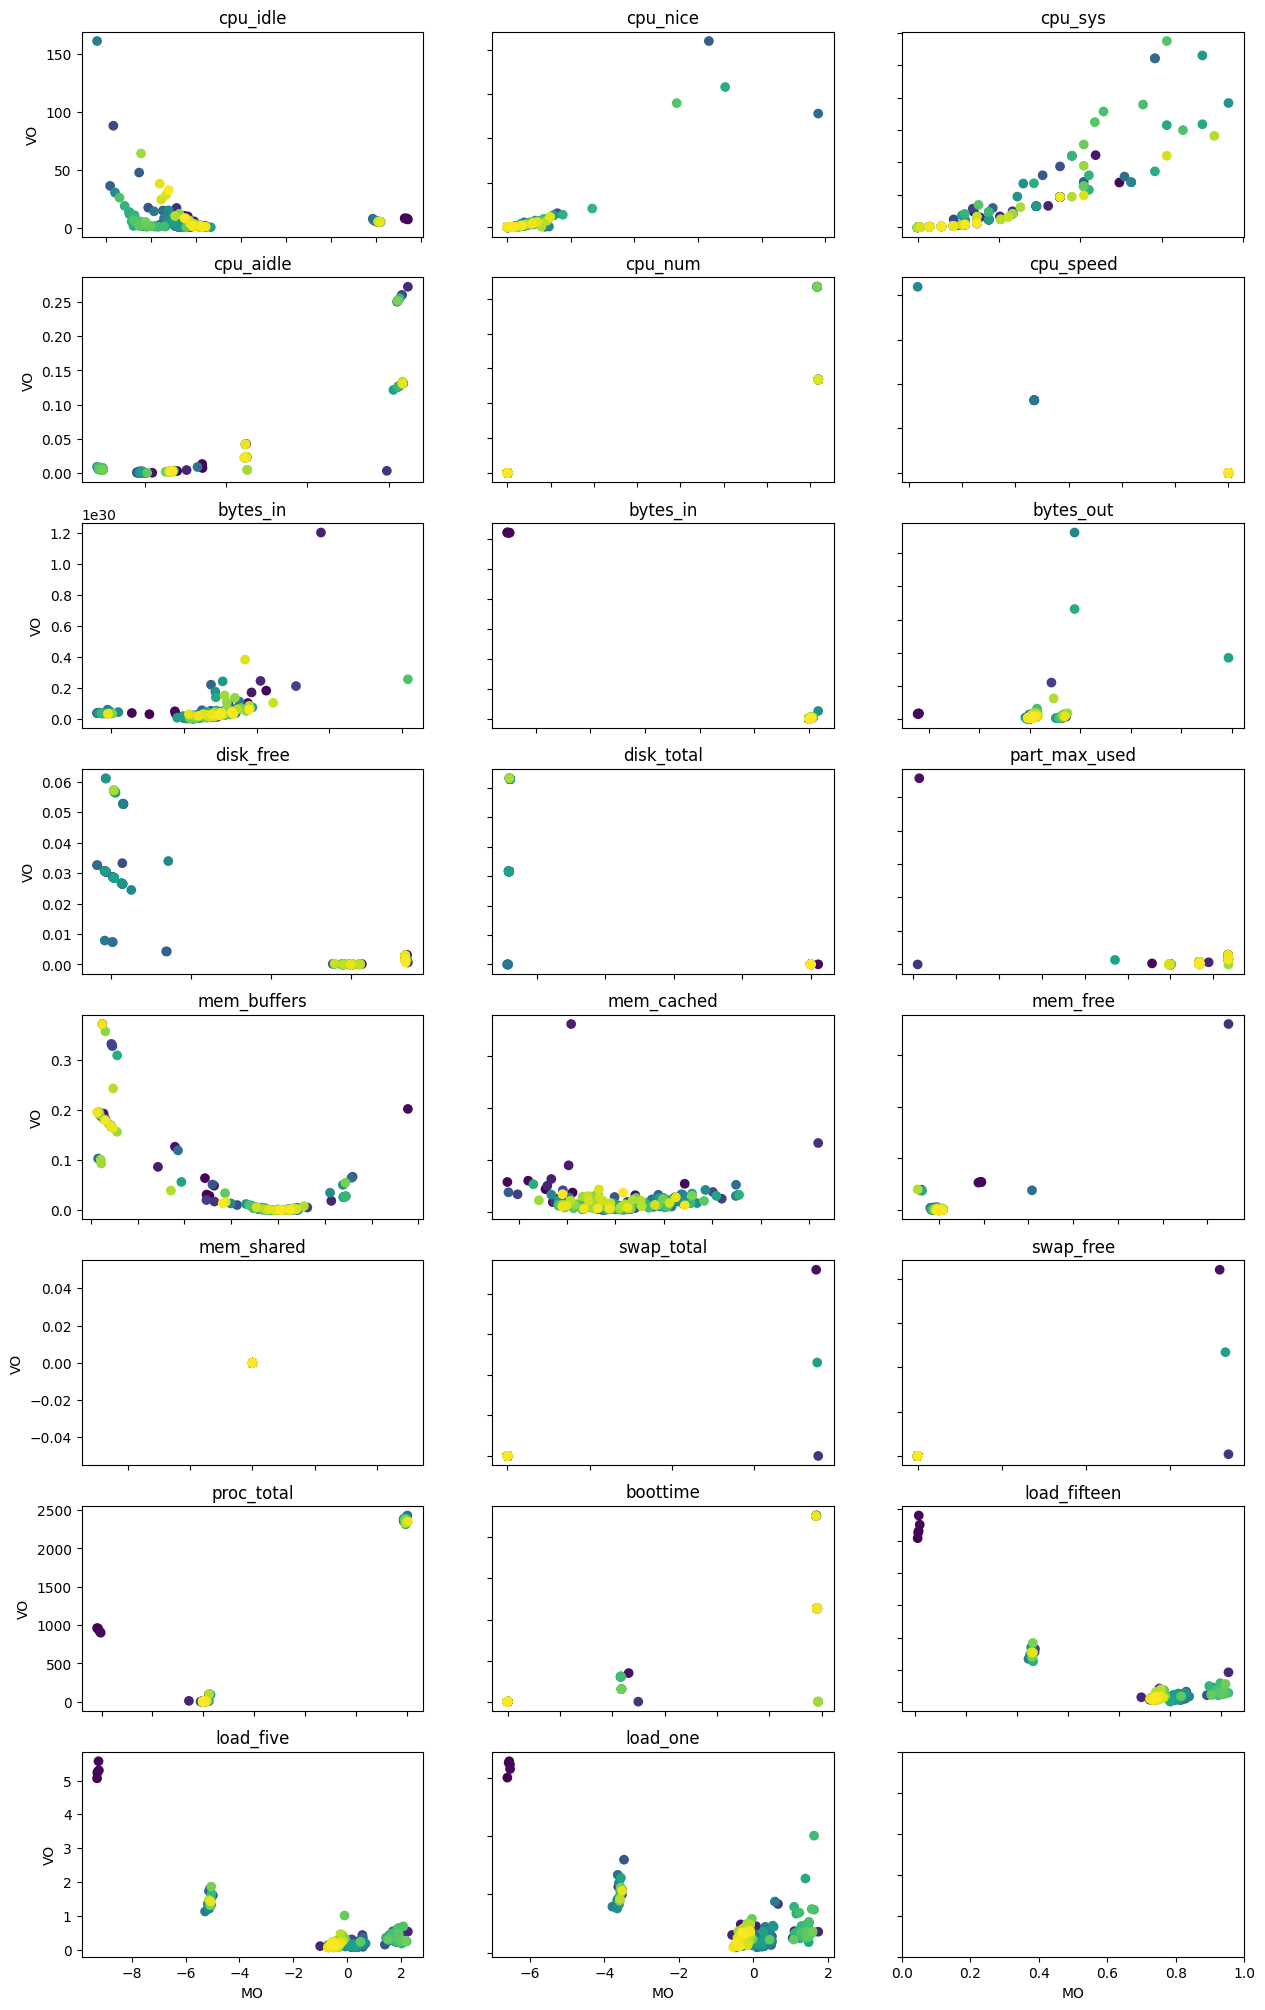

In [106]:
inc_fdo1 = IncFDO()
inc_fdo1.initial_fit(cpu_idle.transpose())
node_ids1 = {node_id: i for i, node_id in enumerate(inc_fdo1.VO.index.unique())}
node_num1 = inc_fdo1.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo1.MO, y=inc_fdo1.VO, c=node_num1)
# plt.title("cpu_idle")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo2 = IncFDO()
inc_fdo2.initial_fit(cpu_nice.transpose())
node_ids2 = {node_id: i for i, node_id in enumerate(inc_fdo2.VO.index.unique())}
node_num2 = inc_fdo2.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo2.MO, y=inc_fdo2.VO, c=node_num2)
# plt.title("cpu_nice")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo3 = IncFDO()
inc_fdo3.initial_fit(cpu_sys.transpose())
node_ids3 = {node_id: i for i, node_id in enumerate(inc_fdo3.VO.index.unique())}
node_num3 = inc_fdo3.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo3.MO, y=inc_fdo3.VO, c=node_num3)
# plt.title("cpu_sys")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo4 = IncFDO()
inc_fdo4.initial_fit(cpu_aidle.transpose())
node_ids4 = {node_id: i for i, node_id in enumerate(inc_fdo4.VO.index.unique())}
node_num4 = inc_fdo4.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo4.MO, y=inc_fdo4.VO, c=node_num4)
# plt.title("cpu_aidle")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo5 = IncFDO()
inc_fdo5.initial_fit(cpu_num.transpose())
node_ids5 = {node_id: i for i, node_id in enumerate(inc_fdo5.VO.index.unique())}
node_num5 = inc_fdo5.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo5.MO, y=inc_fdo5.VO, c=node_num5)
# plt.title("cpu_num")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo7 = IncFDO()
inc_fdo7.initial_fit(cpu_speed.transpose())
node_ids7 = {node_id: i for i, node_id in enumerate(inc_fdo7.VO.index.unique())}
node_num7 = inc_fdo7.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo7.MO, y=inc_fdo7.VO, c=node_num7)
# plt.title("cpu_speed")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo8 = IncFDO()
inc_fdo8.initial_fit(cpu_wio.transpose())
node_ids8 = {node_id: i for i, node_id in enumerate(inc_fdo8.VO.index.unique())}
node_num8 = inc_fdo8.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo8.MO, y=inc_fdo8.VO, c=node_num8)
# plt.title("cpu_wio")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo9 = IncFDO()
inc_fdo9.initial_fit(bytes_in.transpose())
node_ids9 = {node_id: i for i, node_id in enumerate(inc_fdo9.VO.index.unique())}
node_num9 = inc_fdo9.VO.index.map(node_ids)
# plt.scatter(x=inc_fdo9.MO, y=inc_fdo9.VO, c=node_num9)
# plt.title("bytes_in")
# plt.xlabel("MO")
# plt.ylabel("VO")
# plt.show()

inc_fdo10 = IncFDO()
inc_fdo10.initial_fit(bytes_out.transpose())
node_ids10 = {node_id: i for i, node_id in enumerate(inc_fdo10.VO.index.unique())}
node_num10 = inc_fdo10.VO.index.map(node_ids)

inc_fdo11 = IncFDO()
inc_fdo11.initial_fit(disk_free.transpose())
node_ids11 = {node_id: i for i, node_id in enumerate(inc_fdo11.VO.index.unique())}
node_num11 = inc_fdo11.VO.index.map(node_ids)

inc_fdo12 = IncFDO()
inc_fdo12.initial_fit(disk_total.transpose())
node_ids12 = {node_id: i for i, node_id in enumerate(inc_fdo12.VO.index.unique())}
node_num12 = inc_fdo12.VO.index.map(node_ids)

inc_fdo13 = IncFDO()
inc_fdo13.initial_fit(part_max_used.transpose())
node_ids13 = {node_id: i for i, node_id in enumerate(inc_fdo13.VO.index.unique())}
node_num13 = inc_fdo13.VO.index.map(node_ids)

inc_fdo14 = IncFDO()
inc_fdo14.initial_fit(mem_buffers.transpose())
node_ids14 = {node_id: i for i, node_id in enumerate(inc_fdo14.VO.index.unique())}
node_num14 = inc_fdo14.VO.index.map(node_ids)

inc_fdo15 = IncFDO()
inc_fdo15.initial_fit(mem_cached.transpose())
node_ids15 = {node_id: i for i, node_id in enumerate(inc_fdo15.VO.index.unique())}
node_num15 = inc_fdo15.VO.index.map(node_ids)

inc_fdo16 = IncFDO()
inc_fdo16.initial_fit(mem_free.transpose())
node_ids16 = {node_id: i for i, node_id in enumerate(inc_fdo16.VO.index.unique())}
node_num16 = inc_fdo16.VO.index.map(node_ids)

inc_fdo17 = IncFDO()
inc_fdo17.initial_fit(mem_shared.transpose())
node_ids17 = {node_id: i for i, node_id in enumerate(inc_fdo17.VO.index.unique())}
node_num17 = inc_fdo17.VO.index.map(node_ids)

inc_fdo18 = IncFDO()
inc_fdo18.initial_fit(swap_total.transpose())
node_ids18 = {node_id: i for i, node_id in enumerate(inc_fdo18.VO.index.unique())}
node_num18 = inc_fdo18.VO.index.map(node_ids)

inc_fdo19 = IncFDO()
inc_fdo19.initial_fit(swap_free.transpose())
node_ids19 = {node_id: i for i, node_id in enumerate(inc_fdo19.VO.index.unique())}
node_num19 = inc_fdo19.VO.index.map(node_ids)

inc_fdo20 = IncFDO()
inc_fdo20.initial_fit(proc_total.transpose())
node_ids20 = {node_id: i for i, node_id in enumerate(inc_fdo20.VO.index.unique())}
node_num20 = inc_fdo20.VO.index.map(node_ids)

inc_fdo21 = IncFDO()
inc_fdo21.initial_fit(boottime.transpose())
node_ids21 = {node_id: i for i, node_id in enumerate(inc_fdo21.VO.index.unique())}
node_num21 = inc_fdo21.VO.index.map(node_ids)

inc_fdo22 = IncFDO()
inc_fdo22.initial_fit(load_fifteen.transpose())
node_ids22 = {node_id: i for i, node_id in enumerate(inc_fdo22.VO.index.unique())}
node_num22 = inc_fdo22.VO.index.map(node_ids)

inc_fdo23 = IncFDO()
inc_fdo23.initial_fit(load_five.transpose())
node_ids23 = {node_id: i for i, node_id in enumerate(inc_fdo23.VO.index.unique())}
node_num23 = inc_fdo23.VO.index.map(node_ids)

inc_fdo24 = IncFDO()
inc_fdo24.initial_fit(load_one.transpose())
node_ids24 = {node_id: i for i, node_id in enumerate(inc_fdo24.VO.index.unique())}
node_num24 = inc_fdo24.VO.index.map(node_ids)

fig, axs = plt.subplots(8, 3, figsize=(15, 25))
axs[0, 0].scatter(x=inc_fdo1.MO, y=inc_fdo1.VO, c=node_num1)
axs[0, 0].set_title(cols[0])
axs[0, 1].scatter(x=inc_fdo2.MO, y=inc_fdo2.VO, c=node_num2)
axs[0, 1].set_title(cols[1])
axs[0, 2].scatter(x=inc_fdo3.MO, y=inc_fdo3.VO, c=node_num3)
axs[0, 2].set_title(cols[2])
axs[1, 0].scatter(x=inc_fdo4.MO, y=inc_fdo4.VO, c=node_num4)
axs[1, 0].set_title(cols[3])
axs[1, 1].scatter(x=inc_fdo5.MO, y=inc_fdo5.VO, c=node_num5)
axs[1, 1].set_title(cols[4])
axs[1, 2].scatter(x=inc_fdo7.MO, y=inc_fdo7.VO, c=node_num7)
axs[1, 2].set_title(cols[5])
axs[2, 0].scatter(x=inc_fdo8.MO, y=inc_fdo8.VO, c=node_num8)
axs[2, 0].set_title(cols[7])
axs[2, 1].scatter(x=inc_fdo9.MO, y=inc_fdo9.VO, c=node_num9)
axs[2, 1].set_title(cols[7])
axs[2, 2].scatter(x=inc_fdo10.MO, y=inc_fdo10.VO, c=node_num10)
axs[2, 2].set_title(cols[8])
axs[3, 0].scatter(x=inc_fdo11.MO, y=inc_fdo11.VO, c=node_num11)
axs[3, 0].set_title(cols[9])
axs[3, 1].scatter(x=inc_fdo12.MO, y=inc_fdo12.VO, c=node_num12)
axs[3, 1].set_title(cols[10])
axs[3, 2].scatter(x=inc_fdo13.MO, y=inc_fdo13.VO, c=node_num13)
axs[3, 2].set_title(cols[11])
axs[4, 0].scatter(x=inc_fdo14.MO, y=inc_fdo14.VO, c=node_num14)
axs[4, 0].set_title(cols[12])
axs[4, 1].scatter(x=inc_fdo15.MO, y=inc_fdo15.VO, c=node_num15)
axs[4, 1].set_title(cols[13])
axs[4, 2].scatter(x=inc_fdo16.MO, y=inc_fdo16.VO, c=node_num16)
axs[4, 2].set_title(cols[14])
axs[5, 0].scatter(x=inc_fdo17.MO, y=inc_fdo17.VO, c=node_num17)
axs[5, 0].set_title(cols[15])
axs[5, 1].scatter(x=inc_fdo18.MO, y=inc_fdo18.VO, c=node_num18)
axs[5, 1].set_title(cols[16])
axs[5, 2].scatter(x=inc_fdo19.MO, y=inc_fdo19.VO, c=node_num19)
axs[5, 2].set_title(cols[17])
axs[6, 0].scatter(x=inc_fdo20.MO, y=inc_fdo20.VO, c=node_num20)
axs[6, 0].set_title(cols[18])
axs[6, 1].scatter(x=inc_fdo21.MO, y=inc_fdo21.VO, c=node_num21)
axs[6, 1].set_title(cols[19])
axs[6, 2].scatter(x=inc_fdo22.MO, y=inc_fdo22.VO, c=node_num22)
axs[6, 2].set_title(cols[20])
axs[7, 0].scatter(x=inc_fdo23.MO, y=inc_fdo23.VO, c=node_num23)
axs[7, 0].set_title(cols[21])
axs[7, 1].scatter(x=inc_fdo24.MO, y=inc_fdo24.VO, c=node_num24)
axs[7, 1].set_title(cols[22])

for ax in axs.flat:
    ax.set(xlabel='MO', ylabel='VO')

for ax in axs.flat:
    ax.label_outer()

In [7]:
mem_cols = [c for c in df.columns if c in groups['memory']]
all_cols = [c for c in df.columns if c in groups['cpu'] or c == 'nodeId']
cpu_cols = [c for c in df.columns if c in groups['cpu']]
mem_ms_data = df[mem_cols]
cpu_ms_data = df[all_cols]

In [18]:
all_cols = ["cpu_idle", "cpu_nice", "cpu_system", "cpu_aidle", "cpu_num", "cpu_speed", "cpu_wio", "bytes_in", "bytes_out", \
        "disk_free", "disk_total", "part_max_used", "mem_buffers", "mem_cached", "mem_free", "mem_shared", "mem_total", \
        "swap_total", "swap_free", "proc_total", "boottime", "load_fifteen", "load_five", "load_one", "nodeId"]
ms_data = df[all_cols]
ms_data = ms_data.dropna(axis='rows')
ms_data

,cpu_idle,cpu_nice,cpu_system,cpu_aidle,cpu_num,cpu_speed,cpu_wio,bytes_in,bytes_out,disk_free,...,mem_shared,mem_total,swap_total,swap_free,proc_total,boottime,load_fifteen,load_five,load_one,nodeId
0,99.200000,0.000000,0.4,53.2,16.0,2800.0,0.100000,2.896039e+04,14760.330000,910.040000,...,0.0,32632932.0,0.0,0.0,330.000000,1.706625e+09,2.550000,0.33,0.060000,novadaq-far-farm-137
1,99.100000,0.000000,0.0,52.7,16.0,2300.0,0.800000,2.946840e+04,29980.530000,338.604467,...,0.0,32635012.0,0.0,0.0,314.000000,1.705517e+09,2.430000,0.47,0.120000,novadaq-far-farm-186
2,98.200000,0.000000,0.6,46.1,16.0,2000.0,0.300000,3.827400e+04,8257.380000,804.858000,...,0.0,32632916.0,0.0,0.0,313.000000,1.705513e+09,2.720000,0.40,0.230000,novadaq-far-farm-44
3,99.600000,0.000000,0.2,52.6,16.0,2300.0,0.000000,3.801791e+04,982.500000,305.564000,...,0.0,32635016.0,0.0,0.0,318.000000,1.705517e+09,2.700000,0.48,0.170000,novadaq-far-farm-157
4,99.600000,0.000000,0.1,54.4,16.0,2800.0,0.246667,3.672364e+04,4135.500000,913.713000,...,0.0,32633000.0,8388604.0,8098972.0,311.000000,1.706703e+09,2.340000,0.44,0.170000,novadaq-far-farm-104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,54.800000,48.173333,1.9,52.8,16.0,2300.0,0.100000,6.216548e+06,118536.204000,338.003933,...,0.0,32635012.0,0.0,0.0,460.000000,1.705517e+09,7.870000,7.87,7.610000,novadaq-far-farm-135
144996,46.620000,51.880000,2.1,45.8,16.0,2000.0,0.020000,6.197763e+06,142251.346000,804.900000,...,0.0,32632936.0,0.0,0.0,459.000000,1.706625e+09,8.890000,8.92,8.750000,novadaq-far-farm-17
144997,58.420000,41.020000,1.7,57.6,16.0,2800.0,0.200000,6.338609e+06,141976.940000,909.944000,...,0.0,32616544.0,0.0,0.0,463.266667,1.705513e+09,6.950000,6.94,6.810667,novadaq-far-farm-100
144998,92.946667,6.400000,0.4,93.2,48.0,2800.0,0.000000,6.230736e+06,110669.947333,786.605000,...,0.0,32495720.0,0.0,0.0,736.000000,1.705517e+09,3.470667,3.51,3.560000,novadaq-far-farm-170


In [8]:
cpu_ms_data = cpu_ms_data.dropna(axis='rows')
cpu_ms_data

,cpu_system,cpu_idle,cpu_speed,cpu_wio,cpu_nice,cpu_aidle,cpu_num,nodeId
0,2.040000,50.700000,2300.0,0.126667,47.300000,52.9,16.0,novadaq-far-farm-139
1,1.900000,43.100000,2000.0,0.100000,53.900000,46.5,16.0,novadaq-far-farm-36
2,1.800000,48.206667,2300.0,0.100000,43.100000,52.6,16.0,novadaq-far-farm-176
3,1.900000,42.400000,2000.0,0.200000,53.400000,46.3,16.0,novadaq-far-farm-45
4,1.800000,41.400000,2000.0,0.100000,49.600000,45.6,16.0,novadaq-far-farm-17
...,...,...,...,...,...,...,...,...
59995,2.506667,41.160000,2000.0,0.273333,47.800000,46.3,16.0,novadaq-far-farm-37
59996,1.900000,52.100000,2300.0,0.100000,45.000000,52.3,16.0,novadaq-far-farm-168
59997,2.100000,48.913333,2000.0,0.100000,54.833333,46.3,16.0,novadaq-far-farm-47
59998,1.513333,58.106667,2800.0,0.100000,40.700000,57.6,16.0,novadaq-far-farm-76


In [9]:
cpu_cols

['cpu_system',
 'cpu_idle',
 'cpu_speed',
 'cpu_wio',
 'cpu_nice',
 'cpu_aidle',
 'cpu_num']

In [10]:
cpu_ms_data[cpu_cols]

,cpu_system,cpu_idle,cpu_speed,cpu_wio,cpu_nice,cpu_aidle,cpu_num
0,2.040000,50.700000,2300.0,0.126667,47.300000,52.9,16.0
1,1.900000,43.100000,2000.0,0.100000,53.900000,46.5,16.0
2,1.800000,48.206667,2300.0,0.100000,43.100000,52.6,16.0
3,1.900000,42.400000,2000.0,0.200000,53.400000,46.3,16.0
4,1.800000,41.400000,2000.0,0.100000,49.600000,45.6,16.0
...,...,...,...,...,...,...,...
59995,2.506667,41.160000,2000.0,0.273333,47.800000,46.3,16.0
59996,1.900000,52.100000,2300.0,0.100000,45.000000,52.3,16.0
59997,2.100000,48.913333,2000.0,0.100000,54.833333,46.3,16.0
59998,1.513333,58.106667,2800.0,0.100000,40.700000,57.6,16.0


In [12]:
cpu_ms_data

,cpu_system,cpu_idle,cpu_speed,cpu_wio,cpu_nice,cpu_aidle,cpu_num,nodeId
0,2.040000,50.700000,2300.0,0.126667,47.300000,52.9,16.0,novadaq-far-farm-139
1,1.900000,43.100000,2000.0,0.100000,53.900000,46.5,16.0,novadaq-far-farm-36
2,1.800000,48.206667,2300.0,0.100000,43.100000,52.6,16.0,novadaq-far-farm-176
3,1.900000,42.400000,2000.0,0.200000,53.400000,46.3,16.0,novadaq-far-farm-45
4,1.800000,41.400000,2000.0,0.100000,49.600000,45.6,16.0,novadaq-far-farm-17
...,...,...,...,...,...,...,...,...
59995,2.506667,41.160000,2000.0,0.273333,47.800000,46.3,16.0,novadaq-far-farm-37
59996,1.900000,52.100000,2300.0,0.100000,45.000000,52.3,16.0,novadaq-far-farm-168
59997,2.100000,48.913333,2000.0,0.100000,54.833333,46.3,16.0,novadaq-far-farm-47
59998,1.513333,58.106667,2800.0,0.100000,40.700000,57.6,16.0,novadaq-far-farm-76


In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scale = StandardScaler()
min_max = MinMaxScaler()
# df1_mm_scaled = mem_ms_data.copy() 
# df1_std_scaled = mem_ms_data.copy() 
df2_std_scaled = cpu_ms_data.copy()

# df1_mm_scaled = min_max.fit_transform(df1_mm_scaled)
# df1_std_scaled = std_scale.fit_transform(df1_std_scaled)
df2_std_scaled = min_max.fit_transform(cpu_ms_data[cpu_cols])

# inc_fdo_1 = IncFDO()
# inc_fdo_2 = IncFDO()
inc_fdo_3 = IncFDO()
# inc_fdo_1.initial_fit(df1_std_scaled)
# inc_fdo_2.initial_fit(df1_mm_scaled)
inc_fdo_3.initial_fit(cpu_ms_data[cpu_cols])

node_ids = {node_id: i for i, node_id in enumerate(cpu_ms_data['nodeId'].unique())}
node_num = cpu_ms_data['nodeId'].map(node_ids)

In [17]:
ms_data

,cpu_idle,cpu_nice,cpu_system,cpu_aidle,cpu_num,cpu_speed,cpu_wio,bytes_in,bytes_out,disk_free,...,mem_shared,mem_total,swap_total,swap_free,proc_total,boottime,load_fifteen,load_five,load_one,nodeId
0,99.200000,0.000000,0.4,53.2,16.0,2800.0,0.100000,2.896039e+04,14760.330000,910.040000,...,0.0,32632932.0,0.0,0.0,330.000000,1.706625e+09,2.550000,0.33,0.060000,novadaq-far-farm-137
1,99.100000,0.000000,0.0,52.7,16.0,2300.0,0.800000,2.946840e+04,29980.530000,338.604467,...,0.0,32635012.0,0.0,0.0,314.000000,1.705517e+09,2.430000,0.47,0.120000,novadaq-far-farm-186
2,98.200000,0.000000,0.6,46.1,16.0,2000.0,0.300000,3.827400e+04,8257.380000,804.858000,...,0.0,32632916.0,0.0,0.0,313.000000,1.705513e+09,2.720000,0.40,0.230000,novadaq-far-farm-44
3,99.600000,0.000000,0.2,52.6,16.0,2300.0,0.000000,3.801791e+04,982.500000,305.564000,...,0.0,32635016.0,0.0,0.0,318.000000,1.705517e+09,2.700000,0.48,0.170000,novadaq-far-farm-157
4,99.600000,0.000000,0.1,54.4,16.0,2800.0,0.246667,3.672364e+04,4135.500000,913.713000,...,0.0,32633000.0,8388604.0,8098972.0,311.000000,1.706703e+09,2.340000,0.44,0.170000,novadaq-far-farm-104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,54.800000,48.173333,1.9,52.8,16.0,2300.0,0.100000,6.216548e+06,118536.204000,338.003933,...,0.0,32635012.0,0.0,0.0,460.000000,1.705517e+09,7.870000,7.87,7.610000,novadaq-far-farm-135
144996,46.620000,51.880000,2.1,45.8,16.0,2000.0,0.020000,6.197763e+06,142251.346000,804.900000,...,0.0,32632936.0,0.0,0.0,459.000000,1.706625e+09,8.890000,8.92,8.750000,novadaq-far-farm-17
144997,58.420000,41.020000,1.7,57.6,16.0,2800.0,0.200000,6.338609e+06,141976.940000,909.944000,...,0.0,32616544.0,0.0,0.0,463.266667,1.705513e+09,6.950000,6.94,6.810667,novadaq-far-farm-100
144998,92.946667,6.400000,0.4,93.2,48.0,2800.0,0.000000,6.230736e+06,110669.947333,786.605000,...,0.0,32495720.0,0.0,0.0,736.000000,1.705517e+09,3.470667,3.51,3.560000,novadaq-far-farm-170


In [32]:
cols = ['cpu_idle', 'cpu_nice', 'cpu_system', 'cpu_aidle', 'cpu_num', 'cpu_speed', 'cpu_wio', 
            'bytes_in', 'bytes_out', 'disk_free', 'disk_total', 'part_max_used', 'mem_buffers', 
            'mem_cached', 'mem_free','mem_shared', 'mem_total', 'swap_total', 'swap_free', 
            'proc_total', 'boottime', 'load_fifteen', 'load_five', 'load_one']

ms_data_vals = ms_data[cols]
ms_data_final = pd.DataFrame()
for i in range(ms_data_vals.shape[1]):
    # min_max = MinMaxScaler()
    min_value = min(ms_data_vals[ms_data_vals.columns[i]])
    max_value = max(ms_data_vals[ms_data_vals.columns[i]])
    ms_data_final[ms_data_vals.columns[i]] = (ms_data_vals[ms_data_vals.columns[i]] - min_value) / (max_value - min_value)

node_ids = {node_id: i for i, node_id in enumerate(ms_data['nodeId'].unique())}
node_num = ms_data['nodeId'].map(node_ids)
ms_data_final

,cpu_idle,cpu_nice,cpu_system,cpu_aidle,cpu_num,cpu_speed,cpu_wio,bytes_in,bytes_out,disk_free,...,mem_free,mem_shared,mem_total,swap_total,swap_free,proc_total,boottime,load_fifteen,load_five,load_one
0,0.989545,0.000000,0.054054,0.141002,0.0,1.000,0.001437,0.003547,0.025627,0.992867,...,0.200672,NaN,1.388429e-03,0.0,0.000000,0.098947,0.366967,0.270701,0.034091,0.004471
1,0.988238,0.000000,0.000000,0.131725,0.0,0.375,0.011494,0.003621,0.052052,0.054344,...,0.203022,NaN,1.409476e-03,0.0,0.000000,0.065263,0.001164,0.257962,0.048554,0.008942
2,0.976477,0.000000,0.081081,0.009276,0.0,0.000,0.004310,0.004916,0.014337,0.820117,...,0.204096,NaN,1.388267e-03,0.0,0.000000,0.063158,0.000016,0.288747,0.041322,0.017139
3,0.994773,0.000000,0.027027,0.129870,0.0,0.375,0.000000,0.004878,0.001706,0.000079,...,0.205276,NaN,1.409516e-03,0.0,0.000000,0.073684,0.001182,0.286624,0.049587,0.012668
4,0.994773,0.000000,0.013514,0.163265,0.0,1.000,0.003544,0.004688,0.007180,0.998900,...,0.209111,NaN,1.389117e-03,1.0,0.978182,0.058947,0.392602,0.248408,0.045455,0.012668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,0.409305,0.712623,0.256757,0.133581,0.0,0.375,0.001437,0.913078,0.205804,0.053358,...,0.044021,NaN,1.409476e-03,0.0,0.000000,0.372632,0.001167,0.835456,0.813017,0.567064
144996,0.302405,0.767456,0.283784,0.003711,0.0,0.000,0.000287,0.910317,0.246978,0.820186,...,0.046085,NaN,1.388469e-03,0.0,0.000000,0.370526,0.367061,0.943737,0.921488,0.652012
144997,0.456613,0.606805,0.229730,0.222635,0.0,1.000,0.002874,0.931020,0.246502,0.992709,...,0.033707,NaN,1.222606e-03,0.0,0.000000,0.379509,0.000023,0.737792,0.716942,0.507501
144998,0.907824,0.094675,0.054054,0.883117,1.0,1.000,0.000000,0.915164,0.192146,0.790138,...,0.021991,NaN,4.047426e-08,0.0,0.000000,0.953684,0.001177,0.368436,0.362603,0.265276


In [33]:
ms_data_final.to_csv('ms_final.csv')

In [52]:
cols = [x for x in all_cols if x != 'nodeId' and x != 'timestamp']
cols

['cpu_idle',
 'cpu_nice',
 'cpu_system',
 'cpu_aidle',
 'cpu_num',
 'cpu_speed',
 'cpu_wio',
 'bytes_in',
 'bytes_out',
 'disk_free',
 'disk_total',
 'part_max_used',
 'mem_buffers',
 'mem_cached',
 'mem_free',
 'mem_shared',
 'mem_total',
 'swap_total',
 'swap_free',
 'proc_total',
 'boottime',
 'load_fifteen',
 'load_five',
 'load_one']

/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


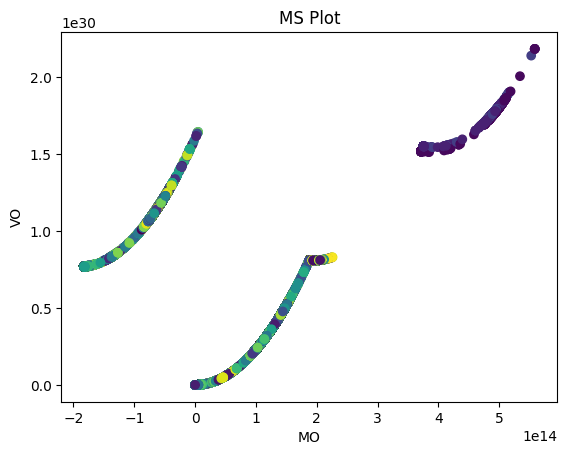

In [16]:
inc_fdo = IncFDO()
inc_fdo.initial_fit(ms_data_final)

plt.scatter(x=inc_fdo.MO, y=inc_fdo.VO, c=node_num)
plt.title("MS Plot")
plt.xlabel("MO")
plt.ylabel("VO")
plt.show()

In [18]:
cpu_data = cpu_ms_data[cpu_cols]
cpu_data_final = pd.DataFrame()
for i in range(cpu_data.shape[1]):
    # min_max = MinMaxScaler()
    min_value = min(cpu_data[cpu_data.columns[i]])
    max_value = max(cpu_data[cpu_data.columns[i]])
    cpu_data_final[cpu_data.columns[i]] = (cpu_data[cpu_data.columns[i]] - min_value) / (max_value - min_value)

cpu_data_final

,cpu_system,cpu_idle,cpu_speed,cpu_wio,cpu_nice,cpu_aidle,cpu_num
0,0.582857,0.286541,0.375,0.042222,0.733333,0.146586,0.0
1,0.542857,0.176556,0.000,0.033333,0.835659,0.018072,0.0
2,0.514286,0.250458,0.375,0.033333,0.668217,0.140562,0.0
3,0.542857,0.166425,0.000,0.066667,0.827907,0.014056,0.0
4,0.514286,0.151954,0.000,0.033333,0.768992,0.000000,0.0
...,...,...,...,...,...,...,...
59995,0.716190,0.148480,0.000,0.091111,0.741085,0.014056,0.0
59996,0.542857,0.306802,0.375,0.033333,0.697674,0.134538,0.0
59997,0.600000,0.260685,0.000,0.033333,0.850129,0.014056,0.0
59998,0.432381,0.393729,1.000,0.033333,0.631008,0.240964,0.0


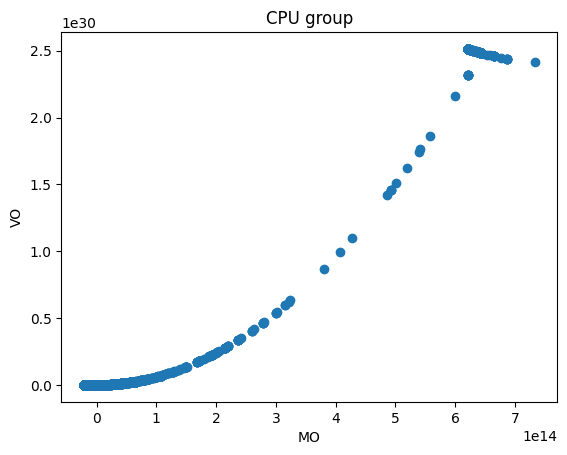

In [19]:
inc_fdo_4 = IncFDO()
inc_fdo_4.initial_fit(cpu_data_final)

plt.scatter(x=inc_fdo_4.MO, y=inc_fdo_4.VO)
plt.title("CPU group")
plt.xlabel("MO")
plt.ylabel("VO")
plt.show()

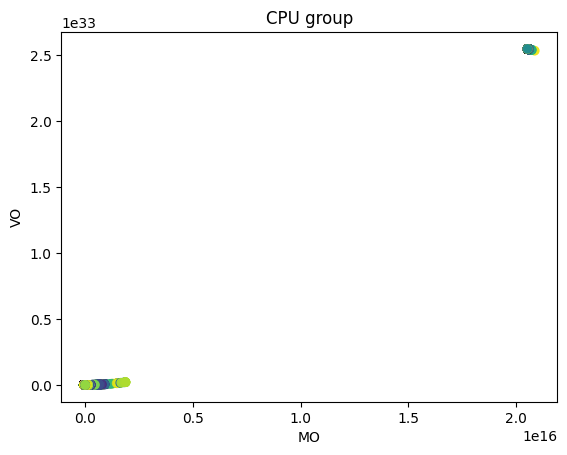

In [14]:
plt.scatter(x=inc_fdo_3.MO, y=inc_fdo_3.VO, c=node_num)
plt.title("CPU group")
plt.xlabel("MO")
plt.ylabel("VO")
plt.show()

In [8]:
from statsmodels.gam.api import GLMGam, BSplines
from scipy.interpolate import BSpline
from datetime import datetime 
import seaborn as sns
from skfda import FDataGrid

df = pd.read_csv('ui/data/farm/far_data_2024-02-22.csv', skiprows=15000, nrows=60000, names=cols)
df_baseline = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_idle')
                # .apply(lambda row: row.fillna(row.mean()), axis=0).T
cols = df.columns
df_baseline

nodeId,novadaq-far-farm-06,novadaq-far-farm-07,novadaq-far-farm-08,novadaq-far-farm-09,novadaq-far-farm-10,novadaq-far-farm-100,novadaq-far-farm-101,novadaq-far-farm-102,novadaq-far-farm-103,novadaq-far-farm-104,...,novadaq-far-farm-90,novadaq-far-farm-91,novadaq-far-farm-92,novadaq-far-farm-93,novadaq-far-farm-94,novadaq-far-farm-95,novadaq-far-farm-96,novadaq-far-farm-97,novadaq-far-farm-98,novadaq-far-farm-99
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-02-22 00:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.800000,NaN
2024-02-22 00:19:15,99.700000,99.6,100.000000,98.800000,99.775556,61.200000,54.500000,52.833333,56.733333,57.626667,...,55.093333,69.400000,93.2,54.948889,58.126667,57.982222,55.300000,58.462222,60.666667,58.560000
2024-02-22 00:19:30,99.700000,99.6,100.000000,98.800000,99.775556,61.200000,56.773333,57.110000,59.700000,57.466667,...,55.093333,69.400000,93.2,55.600000,58.126667,57.982222,55.500000,58.462222,60.400000,54.600000
2024-02-22 00:19:45,99.700000,99.6,100.000000,98.800000,99.775556,61.200000,56.773333,57.110000,55.100000,50.400000,...,55.093333,65.400000,93.2,59.300000,58.126667,57.982222,56.576667,61.533333,60.400000,57.426667
2024-02-22 00:20:00,99.700000,99.6,99.517778,98.800000,99.900000,61.200000,56.773333,56.200000,55.100000,50.400000,...,58.333333,58.120000,93.2,57.500000,57.100000,61.233333,56.576667,60.266667,56.933333,65.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22 01:35:00,99.700000,98.3,99.600000,99.700000,99.000000,57.900000,61.180000,72.100000,60.800000,61.300000,...,60.200000,55.900000,92.6,59.000000,58.200000,55.246667,62.300000,65.100000,63.406667,64.980000
2024-02-22 01:35:15,99.700000,98.3,99.600000,99.726667,99.000000,57.366667,52.706667,58.300000,59.866667,56.100000,...,60.200000,55.900000,92.6,67.400000,58.200000,55.246667,70.420000,51.500000,48.500000,30.900000
2024-02-22 01:35:30,99.593333,99.8,99.600000,99.900000,99.000000,53.900000,52.706667,57.233333,59.800000,56.246667,...,53.100000,55.900000,92.6,67.400000,58.200000,54.600000,52.500000,51.500000,50.246667,43.300000


In [24]:
len(df.nodeId.unique())

195

In [9]:
nodes = df_baseline.columns

In [10]:
X_ori = df_baseline.T
X_ori

timestamp,2024-02-22 00:19:00,2024-02-22 00:19:15,2024-02-22 00:19:30,2024-02-22 00:19:45,2024-02-22 00:20:00,2024-02-22 00:20:15,2024-02-22 00:20:30,2024-02-22 00:20:45,2024-02-22 00:21:00,2024-02-22 00:21:15,...,2024-02-22 01:33:45,2024-02-22 01:34:00,2024-02-22 01:34:15,2024-02-22 01:34:30,2024-02-22 01:34:45,2024-02-22 01:35:00,2024-02-22 01:35:15,2024-02-22 01:35:30,2024-02-22 01:35:45,2024-02-22 01:36:00
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,NaN,99.700000,99.700000,99.700000,99.700000,99.780000,99.800000,99.800000,99.800000,99.868889,...,99.500000,99.526667,99.700000,99.700000,99.700000,99.700000,99.700000,99.593333,98.900000,98.900000
novadaq-far-farm-07,NaN,99.600000,99.600000,99.600000,99.600000,99.600000,99.700000,99.900000,99.900000,99.900000,...,99.600000,98.300000,98.300000,98.300000,98.300000,98.300000,98.300000,99.800000,99.800000,99.800000
novadaq-far-farm-08,NaN,100.000000,100.000000,100.000000,99.517778,99.517778,99.517778,99.300000,99.300000,99.300000,...,99.800000,99.800000,99.773333,99.600000,99.600000,99.600000,99.600000,99.600000,99.900000,99.900000
novadaq-far-farm-09,NaN,98.800000,98.800000,98.800000,98.800000,99.440000,99.600000,99.600000,99.600000,99.600000,...,99.786667,99.700000,99.700000,99.700000,99.700000,99.700000,99.726667,99.900000,99.900000,NaN
novadaq-far-farm-10,NaN,99.775556,99.775556,99.775556,99.900000,99.900000,99.900000,99.900000,99.900000,99.000000,...,98.200000,98.200000,98.200000,98.200000,98.200000,99.000000,99.000000,99.000000,99.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,NaN,57.982222,57.982222,57.982222,61.233333,58.166667,51.100000,51.100000,56.166667,60.600000,...,62.400000,64.200000,74.326667,63.246667,63.246667,55.246667,55.246667,54.600000,74.100000,74.100000
novadaq-far-farm-96,NaN,55.300000,55.500000,56.576667,56.576667,57.400000,57.640000,55.460000,55.873333,54.840000,...,59.000000,59.000000,50.813333,50.813333,62.300000,62.300000,70.420000,52.500000,58.200000,58.200000
novadaq-far-farm-97,NaN,58.462222,58.462222,61.533333,60.266667,54.370000,54.370000,56.300000,56.620000,57.300000,...,52.100000,52.100000,52.100000,52.100000,65.100000,65.100000,51.500000,51.500000,64.006667,64.900000


In [29]:
df.groupby('nodeId')

In [16]:
init_n = len(X_ori.index)
init_n

195

In [60]:
inc_fdo = IncFDO()
inc_fdo.initial_fit(X_ori)
init_list = np.vstack((inc_fdo.MO, inc_fdo.VO)).T.tolist()

In [36]:
len(np.vstack((inc_fdo.MO, inc_fdo.VO)).T.tolist())

195

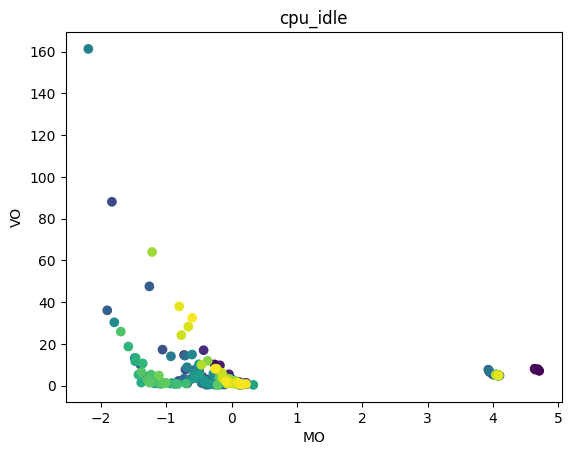

In [61]:
node_ids = {node_id: i for i, node_id in enumerate(nodes)}
node_num = nodes.map(node_ids)
plt.scatter(x=inc_fdo.MO, y=inc_fdo.VO, c=node_num)
plt.title("cpu_idle")
plt.xlabel("MO")
plt.ylabel("VO")
plt.show()

In [42]:
nrows = 60000+15000
nrows_inc = 1000
fd1 = pd.read_csv('ui/data/farm/far_data_2024-02-22.csv', skiprows=nrows, nrows=nrows_inc, names=cols)
fd1 = fd1.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_idle').T
fd1

timestamp,2024-02-22 01:36:00,2024-02-22 01:36:15,2024-02-22 01:36:30,2024-02-22 01:36:45,2024-02-22 01:37:00,2024-02-22 01:37:15
nodeId,,,,,,
novadaq-far-farm-06,NaN,98.900000,98.900000,98.900000,99.900000,99.900000
novadaq-far-farm-07,NaN,99.800000,99.800000,99.800000,99.900000,NaN
novadaq-far-farm-08,NaN,99.900000,99.900000,99.900000,99.900000,98.400000
novadaq-far-farm-09,99.9,99.900000,99.900000,99.900000,97.773333,97.773333
novadaq-far-farm-10,99.0,99.000000,98.400000,98.400000,98.400000,98.400000
...,...,...,...,...,...,...
novadaq-far-farm-95,NaN,56.200000,59.540000,59.540000,66.400000,49.653333
novadaq-far-farm-96,NaN,60.900000,51.686667,55.700000,56.326667,59.546667
novadaq-far-farm-97,NaN,49.800000,49.800000,56.900000,56.700000,53.900000


In [68]:
fd1.mean(axis=1)

nodeId
novadaq-far-farm-06    99.300000
novadaq-far-farm-07    99.825000
novadaq-far-farm-08    99.600000
novadaq-far-farm-09    99.191111
novadaq-far-farm-10    98.600000
                         ...    
novadaq-far-farm-95    58.266667
novadaq-far-farm-96    56.832000
novadaq-far-farm-97    53.420000
novadaq-far-farm-98    62.980000
novadaq-far-farm-99    62.620000
Length: 195, dtype: float64

In [54]:
fd1['avg'] = fd1.iloc[:, :-1].mean(axis=1)
fd1['avg']

nodeId
novadaq-far-farm-06    99.300000
novadaq-far-farm-07    99.825000
novadaq-far-farm-08    99.600000
novadaq-far-farm-09    99.191111
novadaq-far-farm-10    98.600000
                         ...    
novadaq-far-farm-95    58.266667
novadaq-far-farm-96    56.832000
novadaq-far-farm-97    53.420000
novadaq-far-farm-98    62.980000
novadaq-far-farm-99    62.620000
Name: avg, Length: 195, dtype: float64

In [62]:
fd1.iloc[:init_n, -1]

nodeId
novadaq-far-farm-06    99.300000
novadaq-far-farm-07    99.825000
novadaq-far-farm-08    99.600000
novadaq-far-farm-09    99.191111
novadaq-far-farm-10    98.600000
                         ...    
novadaq-far-farm-95    58.266667
novadaq-far-farm-96    56.832000
novadaq-far-farm-97    53.420000
novadaq-far-farm-98    62.980000
novadaq-far-farm-99    62.620000
Name: avg, Length: 195, dtype: float64

In [63]:
x_new = fd1.iloc[:init_n, -1].to_numpy()
inc_fdo.partial_fit(x_new)
new_list = np.vstack((inc_fdo.MO, inc_fdo.VO)).T.tolist()

In [64]:
inc_fdo.MO

nodeId
novadaq-far-farm-06    4.693160
novadaq-far-farm-07    4.711911
novadaq-far-farm-08    4.641028
novadaq-far-farm-09    4.684108
novadaq-far-farm-10    4.650769
                         ...   
novadaq-far-farm-95    0.221418
novadaq-far-farm-96   -0.079962
novadaq-far-farm-97    0.154228
novadaq-far-farm-98   -0.249539
novadaq-far-farm-99   -0.598085
Length: 195, dtype: float64

In [65]:
inc_fdo.VO

nodeId
novadaq-far-farm-06     7.814149
novadaq-far-farm-07     7.088181
novadaq-far-farm-08     8.131269
novadaq-far-farm-09     7.831230
novadaq-far-farm-10     7.701480
                         ...    
novadaq-far-farm-95     0.831837
novadaq-far-farm-96     2.025827
novadaq-far-farm-97     0.815609
novadaq-far-farm-98     8.125169
novadaq-far-farm-99    32.417095
Length: 195, dtype: float64

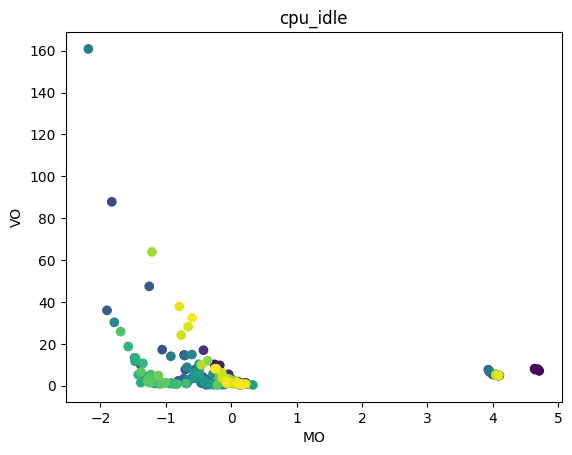

In [66]:
node_ids = {node_id: i for i, node_id in enumerate(nodes)}
node_num = nodes.map(node_ids)
plt.scatter(x=inc_fdo.MO, y=inc_fdo.VO, c=node_num)
plt.title("cpu_idle")
plt.xlabel("MO")
plt.ylabel("VO")
plt.show()

In [506]:
color_df = df.set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_nice') \
                .apply(lambda row: row.fillna(row.mean()), axis=0).T

color_df

timestamp,2024-02-22 00:00:00,2024-02-22 00:00:15,2024-02-22 00:00:30,2024-02-22 00:00:45,2024-02-22 00:01:00,2024-02-22 00:01:15,2024-02-22 00:01:30,2024-02-22 00:01:45,2024-02-22 00:02:00,2024-02-22 00:02:15,...,2024-02-22 01:14:30,2024-02-22 01:14:45,2024-02-22 01:15:00,2024-02-22 01:15:15,2024-02-22 01:15:30,2024-02-22 01:15:45,2024-02-22 01:16:00,2024-02-22 01:16:15,2024-02-22 01:16:30,2024-02-22 01:16:45
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000
novadaq-far-farm-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000
novadaq-far-farm-08,0.000000,0.002110,0.002110,0.002110,0.002110,0.002110,0.002110,0.002110,0.002110,0.002110,...,0.10,0.100000,0.100000,0.10,0.100000,0.02,0.00,0.00,0.000000,0.000000
novadaq-far-farm-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000
novadaq-far-farm-10,0.001975,0.001975,0.001975,0.001975,0.001975,0.001975,0.001975,0.001975,0.001975,0.001975,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.001975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-95,39.400000,29.682065,29.682065,29.682065,29.682065,29.682065,29.682065,29.682065,29.682065,29.682065,...,36.48,36.600000,36.600000,45.64,33.946667,26.44,25.10,30.90,34.880000,37.580000
novadaq-far-farm-96,38.733333,30.830090,30.830090,30.830090,30.830090,30.830090,30.830090,30.830090,30.830090,30.830090,...,40.92,42.300000,42.460000,41.38,25.413333,23.00,33.32,34.70,34.060000,30.830090
novadaq-far-farm-97,30.274286,30.274286,30.274286,30.274286,30.274286,30.274286,30.274286,37.700000,37.700000,39.753333,...,38.18,38.000000,38.000000,38.00,38.000000,38.00,36.96,35.40,40.626667,38.460000


In [326]:
tract = np.arange(df_baseline.shape[1])
n = df_baseline.index.nunique()

# estimating the mean functions
farm_baseline = df_baseline.values
smooth_curves = np.zeros(df_baseline.shape)

n_rows = df_baseline.shape[0] # time points
n_rows

308

In [327]:
print(farm_baseline[0, :].shape)
print(tract.shape)

(195,)
(195,)


In [328]:
bs="cr"
k="10"
optimizer= ['outer', 'newton']
method="GCV.Cp"
nodes = df_baseline.index.to_list()
# filtcols_save = [values] + ['timestamp']

args = ["df_save.csv", nodes, bs, k, str(optimizer)[2:-2], method]

for j in range(n_rows):
    x = tract
    y = farm_baseline[j, :]
    bs = BSplines(x[:, None], df=int(k), degree=[3])
    gam = GLMGam(y, smoother=bs, alpha=0)
    result = gam.fit()
    smooth_curves[j, :] = result.fittedvalues

smooth_curves.shape
# pd.DataFrame(smooth_curves.T).to_csv("/ui/data/farm/farm_smooth_temp.csv", index=False)

(308, 195)

In [341]:
mean_hat = smooth_curves.mean(axis=1)
mean_hat.shape

(308,)

In [342]:
from numpy.linalg import eig

# c_save = filtcols_save + ["mean.hat"]
n_obs = smooth_curves.shape[0]
# covariance of smooth curves
smooth_cov = np.cov(smooth_curves)
smooth_cov.shape

# spectral decomposition of the estimated covariance
evalues, evectors = np.linalg.eigh(smooth_cov)
evalues, evectors = evalues[evalues > 0], evectors[:, evalues > 0]

# scale eigenfunctions
efns0 = evectors * np.sqrt(n_obs)
evals0 = evalues / n_obs
pve = np.cumsum(evals0) / np.sum(evals0)
npc = np.sum(pve < 0.9999) + 1

if npc == 1:
    npc = np.sum(pve < 0.9999998) + 2

# truncated estimated eigen components
efns = efns0[:, :npc]
evals = evals0[:npc]

k_pc = 1
effect = efns[:, k_pc] * 2 * np.sqrt(evals[k_pc])
mat = np.column_stack([mean_hat - effect, mean_hat + effect])

# estimation of scores & fitted curves
demeaned = farm_baseline - mean_hat[:, None]
scores = np.zeros(n_rows, npc)
fitted = np.zeros_like(farm_baseline)

scores = np.dot(demeaned, efns) # PCA scores
fitted = mean_hat[:, None] + np.dot(scores, efns)
scores_fin = pd.DataFrame(scores, columns=[f"PC{k+1}" for k in range(npc)])
scores_fin['Measurement'] = df_baseline.index

values, vectors = eig(smooth_cov)
P = vectors.T.dot(demeaned)

In [279]:
P_fin = pd.DataFrame(P, columns=[f"PC{k+1}" for k in range(P.shape[1])])
P_fin['Measurement'] = df_baseline.index
P_fin

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC300,PC301,PC302,PC303,PC304,PC305,PC306,PC307,PC308,Measurement
0,119.711734+ 0.000000j,105.128685+ 0.000000j,95.560804+ 0.000000j,88.977286+ 0.000000j,81.084687+ 0.000000j,59.171456+ 0.000000j,50.849888+ 0.000000j,41.978070+ 0.000000j,33.449859+ 0.000000j,33.698285+ 0.000000j,...,71.345682+ 0.000000j,87.543219+ 0.000000j,89.599787+ 0.000000j,73.202647+ 0.000000j,72.839198+ 0.000000j,67.749163+ 0.000000j,70.177364+ 0.000000j,70.366070+ 0.000000j,40.815719+ 0.000000j,novadaq-far-farm-06
1,22.904314+ 0.000000j,22.355928+ 0.000000j,20.997033+ 0.000000j,21.869387+ 0.000000j,21.218701+ 0.000000j,17.406775+ 0.000000j,14.498717+ 0.000000j,13.888217+ 0.000000j,12.400167+ 0.000000j,12.973658+ 0.000000j,...,15.634190+ 0.000000j,16.686940+ 0.000000j,15.090593+ 0.000000j,14.440761+ 0.000000j,14.916756+ 0.000000j,18.570600+ 0.000000j,17.024686+ 0.000000j,15.466455+ 0.000000j,14.712808+ 0.000000j,novadaq-far-farm-07
2,-10.427931+ 0.000000j,-31.565462+ 0.000000j,-41.414774+ 0.000000j,-48.036172+ 0.000000j,-54.918585+ 0.000000j,-56.788538+ 0.000000j,-56.743194+ 0.000000j,-57.859630+ 0.000000j,-56.764992+ 0.000000j,-57.954797+ 0.000000j,...,-11.792400+ 0.000000j,7.626196+ 0.000000j,14.979627+ 0.000000j,4.957334+ 0.000000j,-13.636645+ 0.000000j,-20.661241+ 0.000000j,-20.275274+ 0.000000j,-19.202010+ 0.000000j,-19.014910+ 0.000000j,novadaq-far-farm-08
3,1.186227+ 0.000000j,-12.299510+ 0.000000j,-14.534405+ 0.000000j,-14.227580+ 0.000000j,-12.655318+ 0.000000j,-6.994507+ 0.000000j,-9.247651+ 0.000000j,-2.324150+ 0.000000j,-0.083633+ 0.000000j,-1.477055+ 0.000000j,...,9.847757+ 0.000000j,12.471106+ 0.000000j,21.856007+ 0.000000j,2.540423+ 0.000000j,-0.046907+ 0.000000j,-4.829408+ 0.000000j,5.212722+ 0.000000j,3.032566+ 0.000000j,7.410477+ 0.000000j,novadaq-far-farm-09
4,-0.033891+ 0.000000j,3.473163+ 0.000000j,3.378264+ 0.000000j,8.955181+ 0.000000j,11.504778+ 0.000000j,0.134998+ 0.000000j,-3.670745+ 0.000000j,-3.831036+ 0.000000j,-9.269229+ 0.000000j,-7.645240+ 0.000000j,...,22.985853+ 0.000000j,30.797917+ 0.000000j,32.361685+ 0.000000j,28.144584+ 0.000000j,44.865279+ 0.000000j,54.829133+ 0.000000j,64.036161+ 0.000000j,59.789304+ 0.000000j,39.784434+ 0.000000j,novadaq-far-farm-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.597909+ 0.000000j,3.485470+ 0.000000j,4.724123+ 0.000000j,5.477620+ 0.000000j,10.323613+ 0.000000j,8.022497+ 0.000000j,5.345018+ 0.000000j,3.402282+ 0.000000j,4.706571+ 0.000000j,0.481304+ 0.000000j,...,0.384251+ 0.000000j,-4.092535+ 0.000000j,-2.649051+ 0.000000j,6.500315+ 0.000000j,2.353802+ 0.000000j,-1.671227+ 0.000000j,0.915592+ 0.000000j,0.242927+ 0.000000j,1.114377+ 0.000000j,novadaq-far-farm-95
191,-2.509651- 4.583556j,1.882166- 4.268435j,1.667615- 1.300350j,3.196257+ 1.480234j,0.589975- 1.511254j,5.731447- 2.871353j,4.475546- 3.100871j,1.460409- 1.884788j,-0.296382+ 1.114167j,-3.370329- 0.497665j,...,6.871292+ 4.138278j,-1.168583+ 0.747266j,-2.654636+ 7.071820j,2.375588+ 8.023386j,-2.241038- 2.750896j,-0.792570- 0.099363j,0.928685- 1.988390j,-6.352849- 6.900634j,-3.015121- 3.275211j,novadaq-far-farm-96
192,-2.509651+ 4.583556j,1.882166+ 4.268435j,1.667615+ 1.300350j,3.196257- 1.480234j,0.589975+ 1.511254j,5.731447+ 2.871353j,4.475546+ 3.100871j,1.460409+ 1.884788j,-0.296382- 1.114167j,-3.370329+ 0.497665j,...,6.871292- 4.138278j,-1.168583- 0.747266j,-2.654636- 7.071820j,2.375588- 8.023386j,-2.241038+ 2.750896j,-0.792570+ 0.099363j,0.928685+ 1.988390j,-6.352849+ 6.900634j,-3.015121+ 3.275211j,novadaq-far-farm-97
193,-4.523691+ 0.000000j,-5.413843+ 0.000000j,0.258807+ 0.000000j,0.390575+ 0.000000j,-4.090288+ 0.000000j,-6.149494+ 0.000000j,-3.605713+ 0.000000j,-2.699255+ 0.000000j,2.200735+ 0.000000j,1.715589+ 0.000000j,...,7.729295+ 0.000000j,0.859273+ 0.000000j,2.935023+ 0.000000j,3.685393+ 0.000000j,-4.071228+ 0.000000j,-2.844915+ 0.000000j,1.459428+ 0.000000j,1.160284+ 0.000000j,-7.621180+ 0.000000j,novadaq-far-farm-98


/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/allison/anaconda3/envs/myenv/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


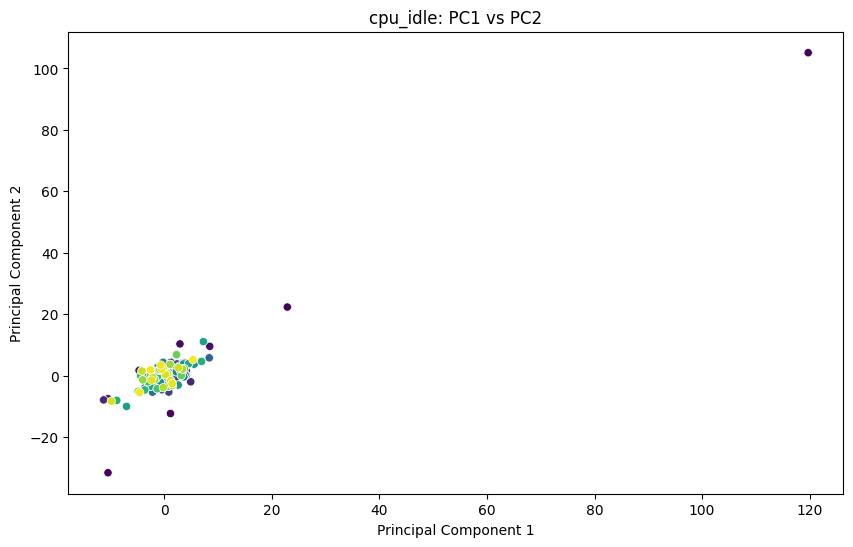

In [287]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=P_fin[['PC1', 'PC2']], hue=P_fin['Measurement'], palette='viridis', legend=False)
plt.title('cpu_idle: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [297]:
n_top_pcs = 3
efns_df = pd.DataFrame(efns)
top_pcs = efns_df.iloc[:, :n_top_pcs]
top_pcs

,0,1,2
0,0.000000,0.000000,0.000000
1,-0.163832,-0.090457,0.105074
2,-0.110244,0.077778,-0.090003
3,-1.497082,-0.021648,-0.096347
4,0.129428,-0.470023,-0.409453
...,...,...,...
190,-0.553496,-0.157263,0.607046
191,-0.847649,0.082193,-0.667056
192,0.102315,0.411592,0.266780
193,-0.977747,0.789268,0.067012


In [299]:
top_pcs[[0]]

,0
0,0.000000
1,-0.163832
2,-0.110244
3,-1.497082
4,0.129428
...,...
190,-0.553496
191,-0.847649
192,0.102315
193,-0.977747


In [450]:
df2 = pd.read_csv('ui/data/farm/far_data_2024-02-21.csv', nrows=60000)
df2['timestamp'] = df2['timestamp'].apply(lambda x: int(x) * 1000 if isinstance(x, int) else int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp()) * 1000)
df2 = df2.replace({np.nan: None})
df2

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,RetransSegs_rate,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs
0,2024-02-21 05:36:00,2.1,None,None,None,0.0,None,1.006667,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2024-02-21 05:36:15,2.1,None,2038.71,None,0.0,None,1.3,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2024-02-21 05:36:30,1.993333,None,2055.49,None,0.0,None,1.3,None,11795.033333,...,None,None,None,None,None,None,None,None,None,None
3,2024-02-21 05:36:45,1.806667,None,2049.026,None,0.0,None,1.3,None,11892.133333,...,None,None,None,None,None,None,None,None,None,None
4,2024-02-21 05:37:00,2.1,1705513521.0,2014.643333,None,0.0,None,1.11,None,11854.6,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2024-02-21 10:48:45,1.44,1705513403.0,2053.34,2385676.0,0.0,176458.02,0.72,55.6,11770.98,...,None,None,None,None,None,None,None,None,None,None
59996,2024-02-21 10:48:45,2.04,1705517671.0,2039.276,3164962.4,0.0,78028.09,1.1,51.5,11856.4,...,None,None,None,None,None,None,None,None,None,None
59997,2024-02-21 10:48:45,1.98,1705516929.0,2003.686667,3773833.333333,0.0,118034.916,0.9,41.7,11872.76,...,None,None,None,None,None,None,None,None,None,None
59998,2024-02-21 10:48:45,1.66,1705513463.0,2000.13,3222920.8,0.0,126733.6,1.5,54.56,11762.98,...,None,None,None,None,None,None,None,None,None,None


In [421]:
df2[['cpu_system']]

,cpu_system
0,2.1
1,2.1
2,1.993333
3,1.806667
4,2.1
...,...
59995,1.44
59996,2.04
59997,1.98
59998,1.66


In [422]:
df2[['cpu_user']].isna().sum()

cpu_user    0
dtype: int64

In [423]:
df2[['nodeId', 'timestamp', 'cpu_user']].dropna()

,nodeId,timestamp,cpu_user
0,novadaq-far-farm-38,1708522560000,1.006667
1,novadaq-far-farm-38,1708522575000,1.3
2,novadaq-far-farm-38,1708522590000,1.3
3,novadaq-far-farm-38,1708522605000,1.3
4,novadaq-far-farm-38,1708522620000,1.11
...,...,...,...
59995,novadaq-far-farm-51,1708541325000,0.72
59996,novadaq-far-farm-169,1708541325000,1.1
59997,novadaq-far-farm-23,1708541325000,0.9
59998,novadaq-far-farm-117,1708541325000,1.5


In [424]:
print(df2[['nodeId', 'timestamp', 'cpu_user']].isna().sum())

nodeId       0
timestamp    0
cpu_user     0
dtype: int64


In [458]:
ms_data = df2[['nodeId', 'timestamp', 'cpu_user']] \
                .set_index('timestamp') \
                .pivot(columns='nodeId', values='cpu_user') \
                .replace({np.nan:None}).T

ms_data

timestamp,2024-02-21 05:36:00,2024-02-21 05:36:15,2024-02-21 05:36:30,2024-02-21 05:36:45,2024-02-21 05:37:00,2024-02-21 05:37:15,2024-02-21 05:37:30,2024-02-21 05:37:45,2024-02-21 05:38:00,2024-02-21 05:38:15,...,2024-02-21 10:46:30,2024-02-21 10:46:45,2024-02-21 10:47:00,2024-02-21 10:47:15,2024-02-21 10:47:30,2024-02-21 10:47:45,2024-02-21 10:48:00,2024-02-21 10:48:15,2024-02-21 10:48:30,2024-02-21 10:48:45
nodeId,,,,,,,,,,,,,,,,,,,,,
novadaq-far-farm-06,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,0.0,0.08,0.2,0.2,0.2,0.2,0.2,0.12
novadaq-far-farm-07,None,None,None,None,None,None,None,None,None,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,None
novadaq-far-farm-09,None,None,None,None,None,None,None,None,None,None,...,0.1,0.1,0.1,0.1,0.1,0.06,0.0,0.0,0.0,None
novadaq-far-farm-10,None,None,None,None,None,None,None,None,None,None,...,0.0,0.08,0.2,0.2,0.2,0.2,0.2,0.12,0.0,0.0
novadaq-far-farm-101,None,None,None,None,None,None,None,None,None,None,...,0.7,0.74,0.833333,0.9,0.9,0.82,0.746667,0.8,0.8,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
novadaq-far-farm-92,None,None,None,None,None,None,None,None,None,None,...,0.1,0.1,0.133333,0.2,0.2,0.2,0.2,0.2,0.153333,None
novadaq-far-farm-94,None,None,None,None,None,None,None,None,None,None,...,0.6,0.6,0.6,0.68,0.76,0.7,0.7,0.74,0.753333,0.7
novadaq-far-farm-95,None,None,None,None,None,None,None,None,None,None,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.66,0.5


In [34]:
pd.read_csv('ms_final-14-15.csv')

,Unnamed: 0,cpu_idle,cpu_nice,cpu_system,cpu_aidle,cpu_num,cpu_speed,cpu_wio,bytes_in,bytes_out,...,mem_free,mem_shared,mem_total,swap_total,swap_free,proc_total,boottime,load_fifteen,load_five,load_one
0,0,0.303047,0.737160,0.340000,0.141129,0.0,0.375,0.03125,0.946870,0.156794,...,0.026439,NaN,0.001409,0.0,0.0,0.344978,0.002766,0.822000,0.776930,0.658354
1,1,0.369806,0.584592,0.341333,0.235887,0.0,1.000,0.03125,0.954934,0.194032,...,0.025346,NaN,0.001223,0.0,0.0,0.342795,0.000053,0.738000,0.711153,0.610973
2,2,0.261773,0.759819,0.380000,0.147177,0.0,0.375,0.03125,0.946697,0.172629,...,0.028951,NaN,0.001410,0.0,0.0,0.340611,0.002807,0.795000,0.764538,0.650540
3,3,0.211911,0.747734,0.380000,0.012097,0.0,0.000,0.03125,0.949087,0.168264,...,0.027220,NaN,0.001389,0.0,0.0,0.347162,0.000044,0.955000,0.911344,0.758105
4,4,0.229917,0.848943,0.409333,0.014113,0.0,0.000,0.03125,0.960367,0.149762,...,0.023478,NaN,0.001389,0.0,0.0,0.340611,0.000104,0.943000,0.895138,0.780050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,0.274238,0.722054,0.341333,0.147177,0.0,0.375,0.03125,0.947873,0.176760,...,0.028688,NaN,0.001410,0.0,0.0,0.340611,0.002807,0.834000,0.818875,0.704073
69996,69996,0.212096,0.765861,0.360000,0.018145,0.0,0.000,0.03125,0.946723,0.173851,...,0.020556,NaN,0.001388,0.0,0.0,0.342795,0.000109,0.956533,0.923737,0.819618
69997,69997,0.358726,0.698792,0.341333,0.141129,0.0,0.375,0.03125,0.946357,0.202630,...,0.024261,NaN,0.001409,0.0,0.0,0.344978,0.002810,0.833000,0.784557,0.669992
69998,69998,0.290859,0.725076,0.400000,0.145161,0.0,0.375,0.03125,0.946118,0.149952,...,0.028085,NaN,0.001410,0.0,0.0,0.340902,0.002796,0.811000,0.762631,0.645885
